In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
#import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import zscore, boxcox
import warnings
warnings.filterwarnings('ignore')

### Read And Display The Data

In [3]:
df = pd.read_csv("C:/Users/kanch/Hr Analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv")
#pd.set_option('display.max_columns', None)
df.head(7)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  

[7 rows x 35 columns]

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lab_enc = LabelEncoder()

In [6]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [7]:
#var_cat = var_cat.columns.tolist()
var_cat = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

var_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
for i in var_cat:
    df[i] = lab_enc.fit_transform(df[i])

df.head()

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

In [9]:
df1 = lab_enc.fit_transform(df['BusinessTravel'])

In [10]:
pd.Series(df1)

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Length: 1470, dtype: int64

In [11]:
df['BusinessTravel'] = df1

In [12]:
df.head()

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

Eliminate columns that only have one data level

In [13]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

In [14]:
df.shape

(1470, 32)

In [15]:
temp

['EmployeeCount', 'Over18', 'StandardHours']

In [16]:
df.describe()

Age  BusinessTravel    DailyRate   Department  \
count  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810        1.607483   802.485714     1.260544   
std       9.135373        0.665455   403.509100     0.527792   
min      18.000000        0.000000   102.000000     0.000000   
25%      30.000000        1.000000   465.000000     1.000000   
50%      36.000000        2.000000   802.000000     1.000000   
75%      43.000000        2.000000  1157.000000     2.000000   
max      60.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeNumber  \
count       1470.000000  1470.000000     1470.000000     1470.000000   
mean           9.192517     2.912925        2.247619     1024.865306   
std            8.106864     1.024165        1.331369      602.024335   
min            1.000000     1.000000        0.000000        1.000000   
25%            2.000000     2.000000        1.000000      491.250000   
50%            7.000000     3.000000        2.000000     1020.500000   
75%           14.000000     4.000000        3.000000     1555.750000   
max           29.000000     5.000000        5.000000     2068.000000   

       EnvironmentSatisfaction       Gender  ...  PerformanceRating  \
count              1470.000000  1470.000000  ...        1470.000000   
mean                  2.721769     0.600000  ...           3.153741   
std                   1.093082     0.490065  ...           0.360824   
min                   1.000000     0.000000  ...           3.000000   
25%                   2.000000     0.000000  ...           3.000000   
50%                   3.000000     1.000000  ...           3.000000   
75%                   4.000000     1.000000  ...           3.000000   
max                   4.000000     1.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 31 columns]

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

<AxesSubplot:>

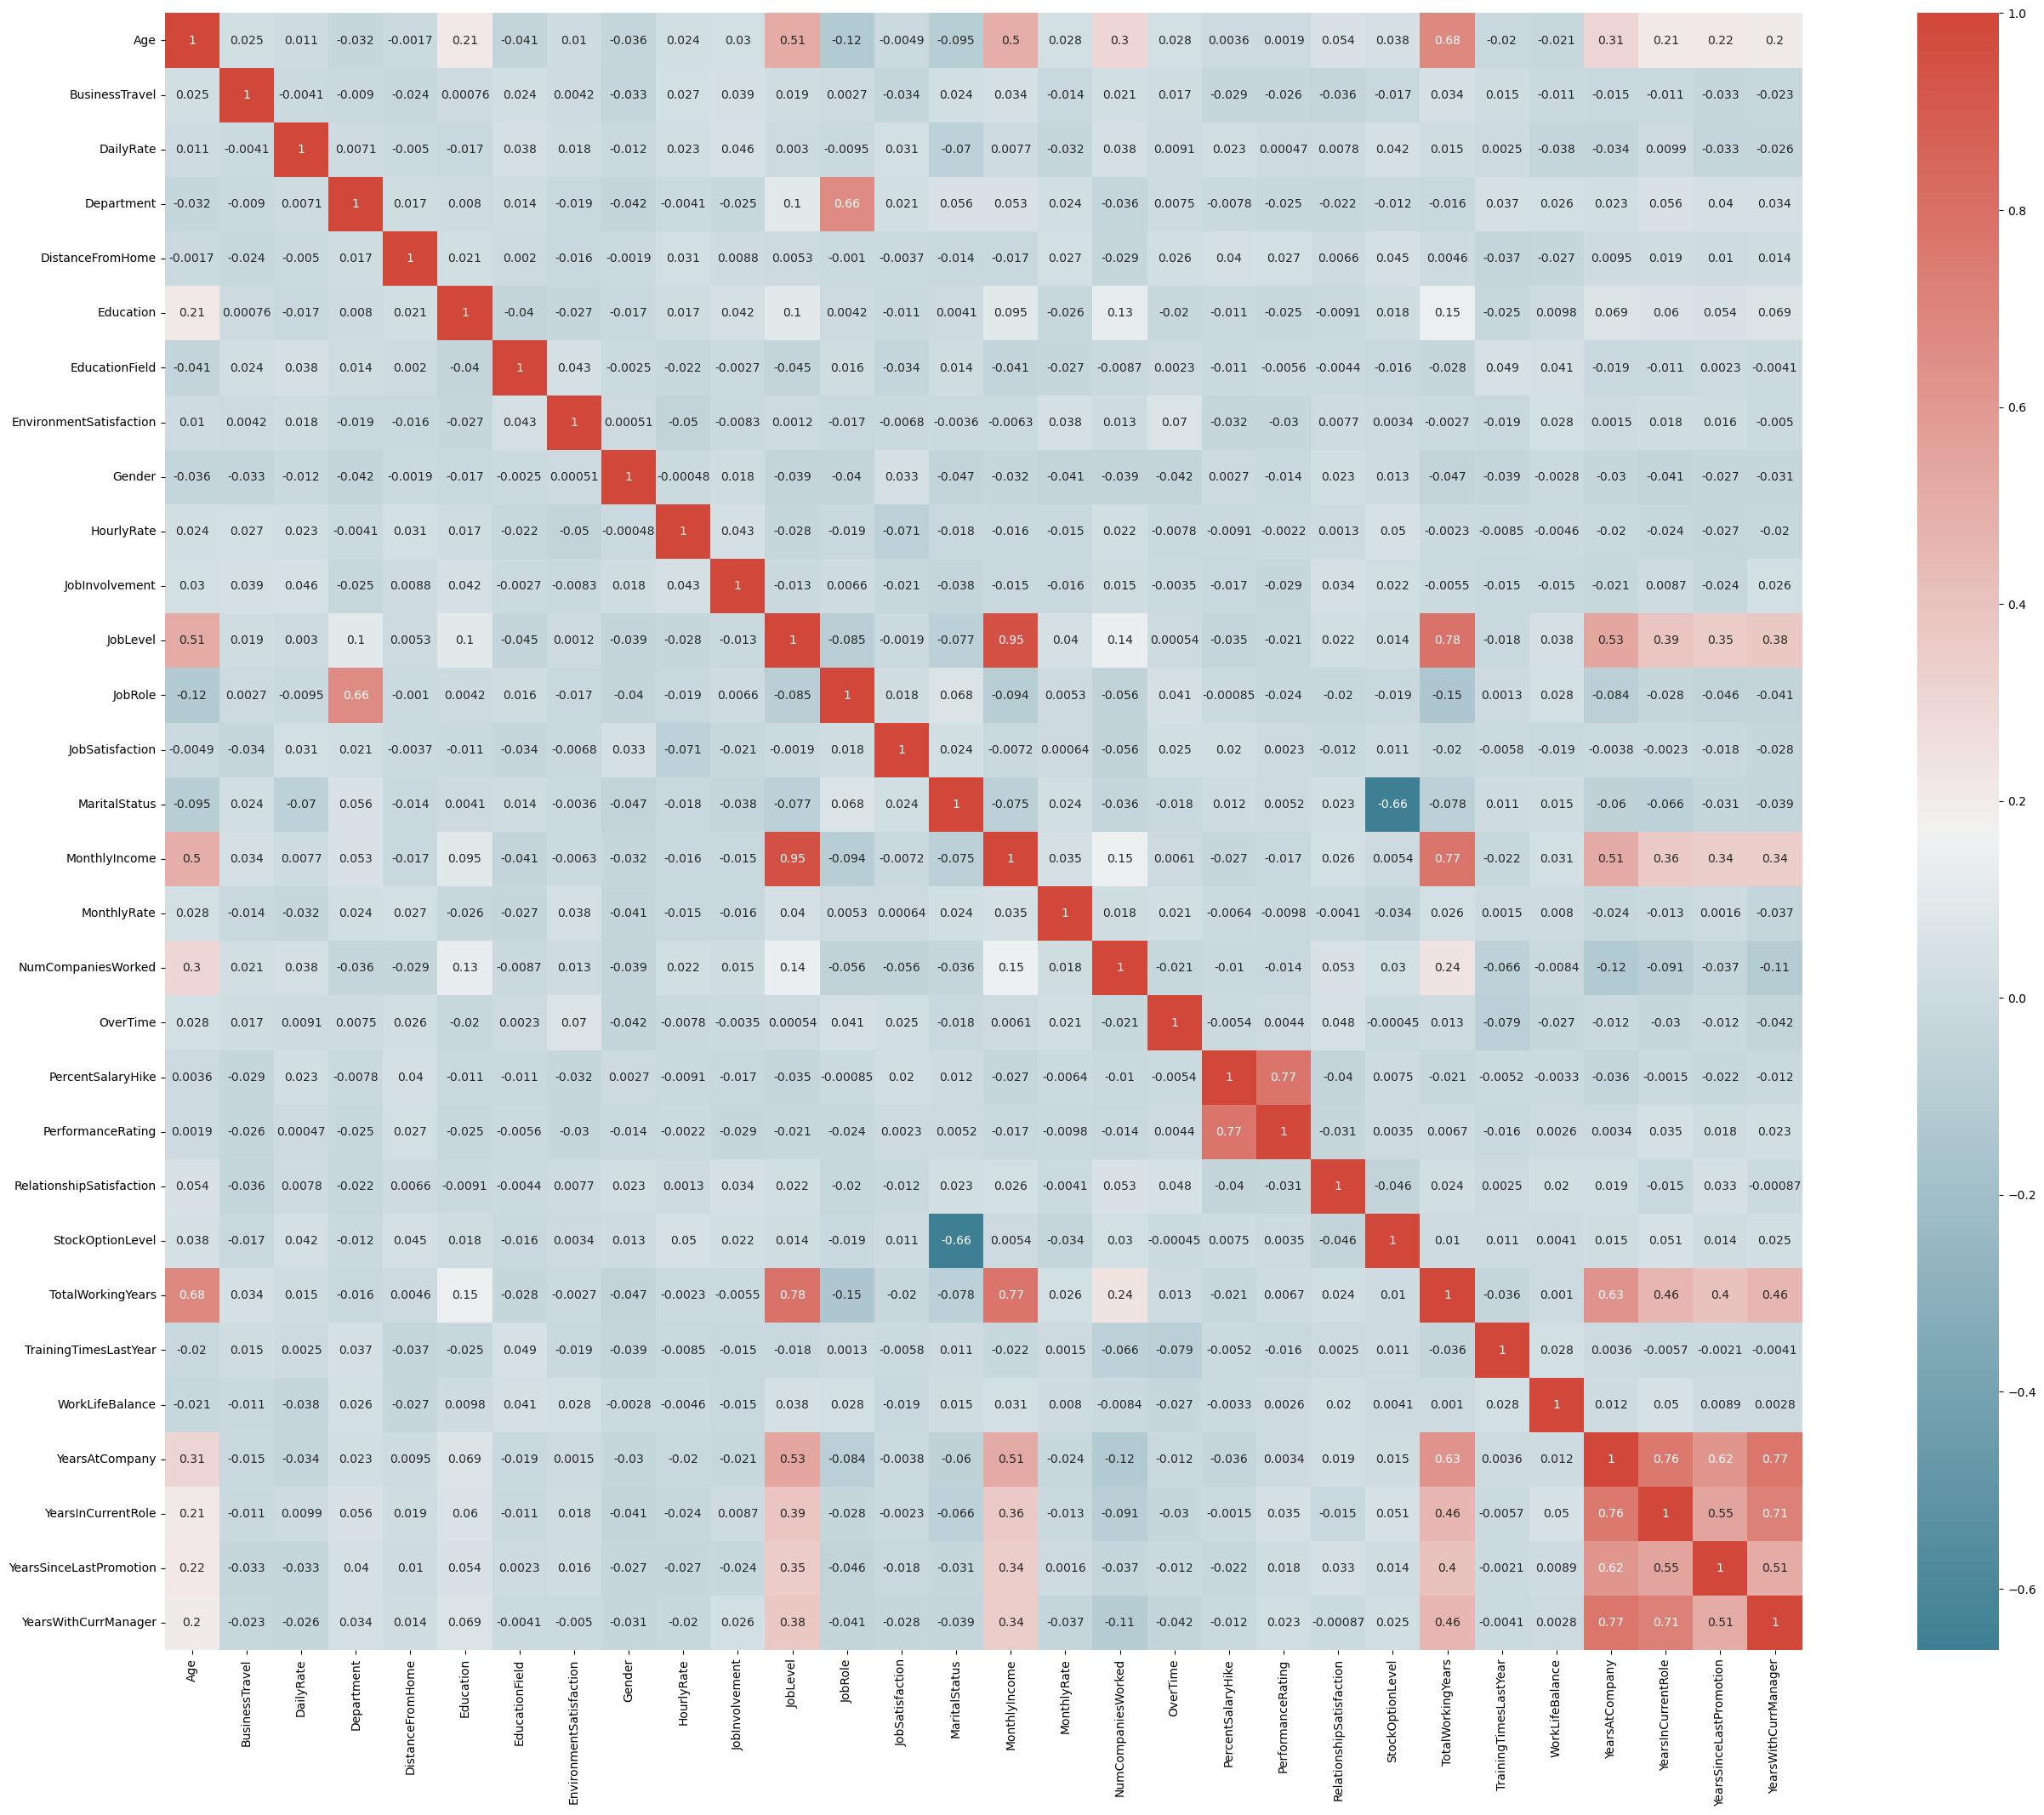

In [19]:
f, ax = plt.subplots(figsize=(35,25))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 15, as_cmap=True),
            square=True, ax=ax, annot = True)

From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. 
We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.

In [20]:
df.drop(['DailyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [21]:
df['OverTime'] = df.OverTime == 'Yes'

In [22]:
df['Attrition'] = df.Attrition == 'Yes'

### Exploratory Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

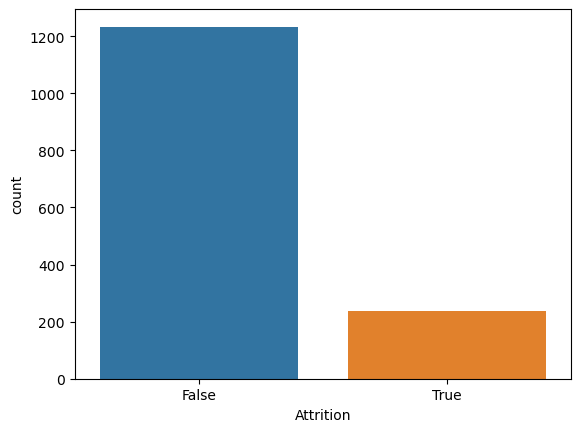

In [23]:
sns.countplot(x='Attrition', data=df)

This section is providing a general idea about attrition in the data set by looking at gender, marital status and department.

Male is generally more likely to quit than female.

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

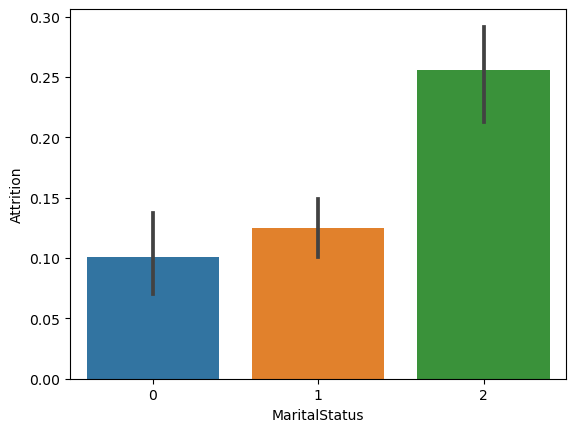

In [24]:
sns.barplot(x = 'MaritalStatus', y='Attrition', data=df)

Single people are more likely to quit compared to married and divorced people.

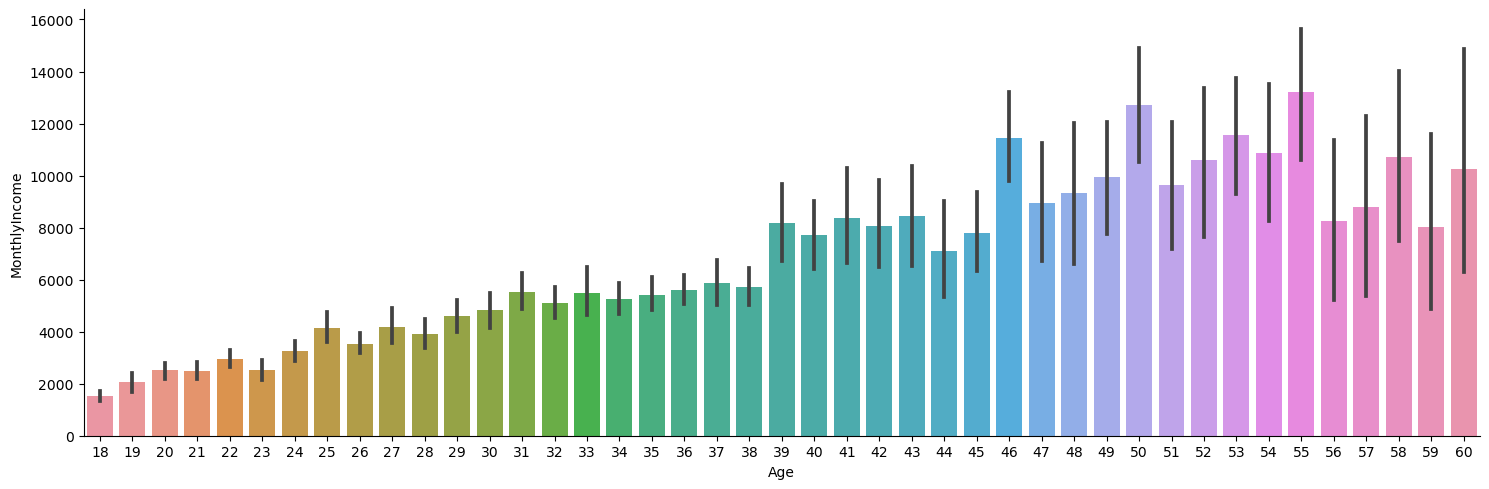

In [25]:
# We Check the monthly income by age in the age
sns.factorplot(x = 'Age', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3)

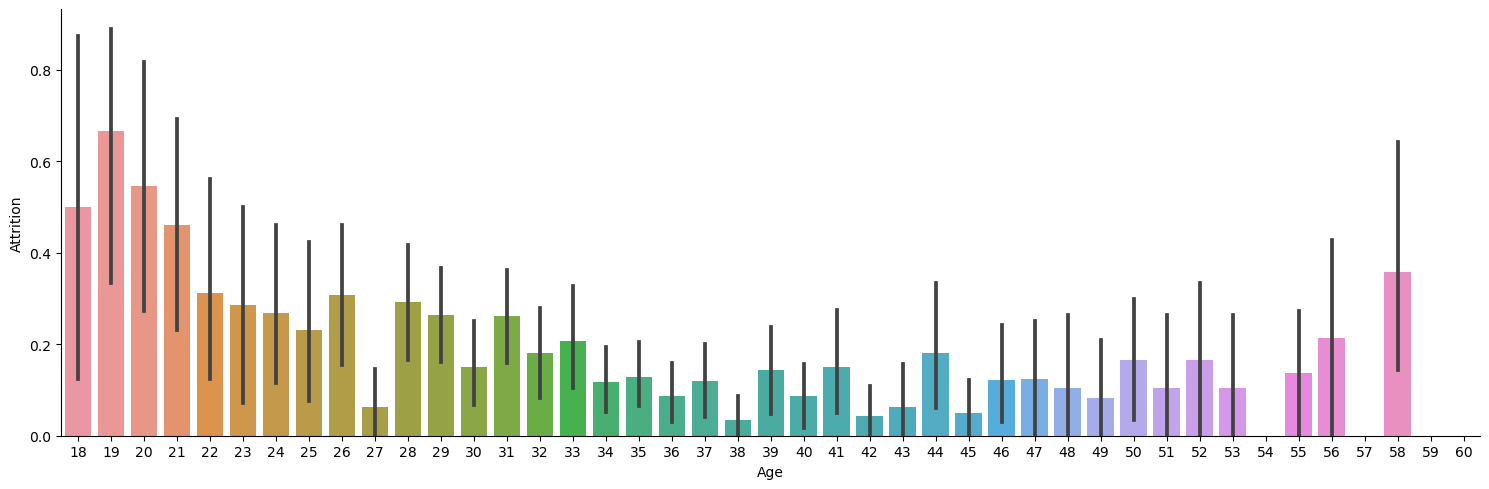

In [26]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

Younger people are having higher attrition rate compared to older people.

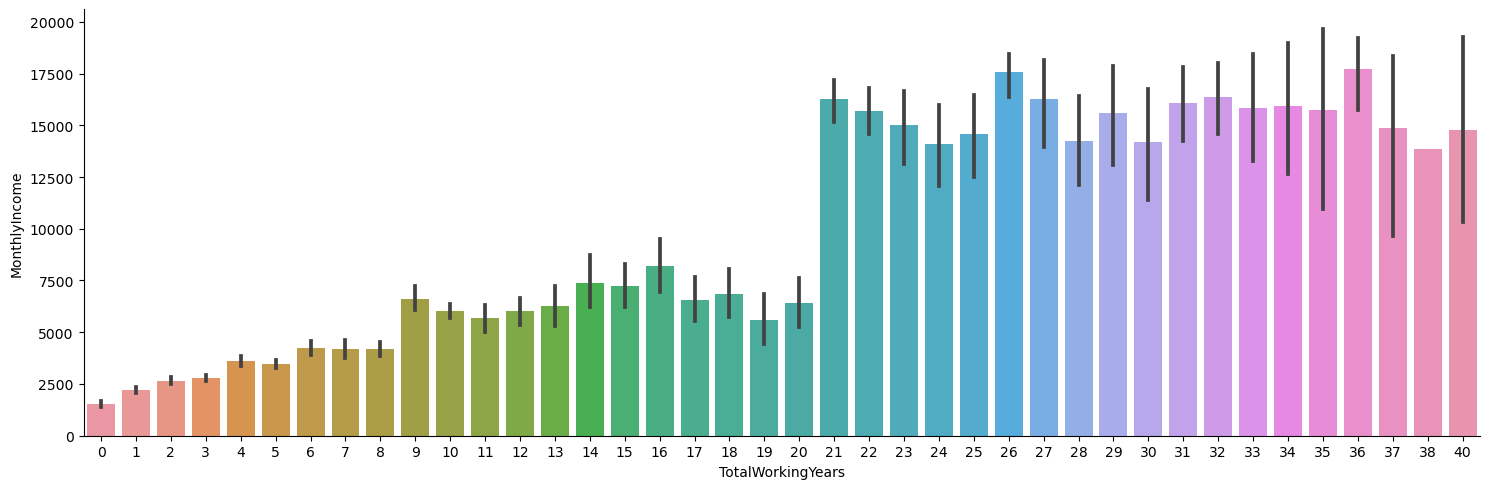

In [27]:
sns.factorplot(x = 'TotalWorkingYears', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3)

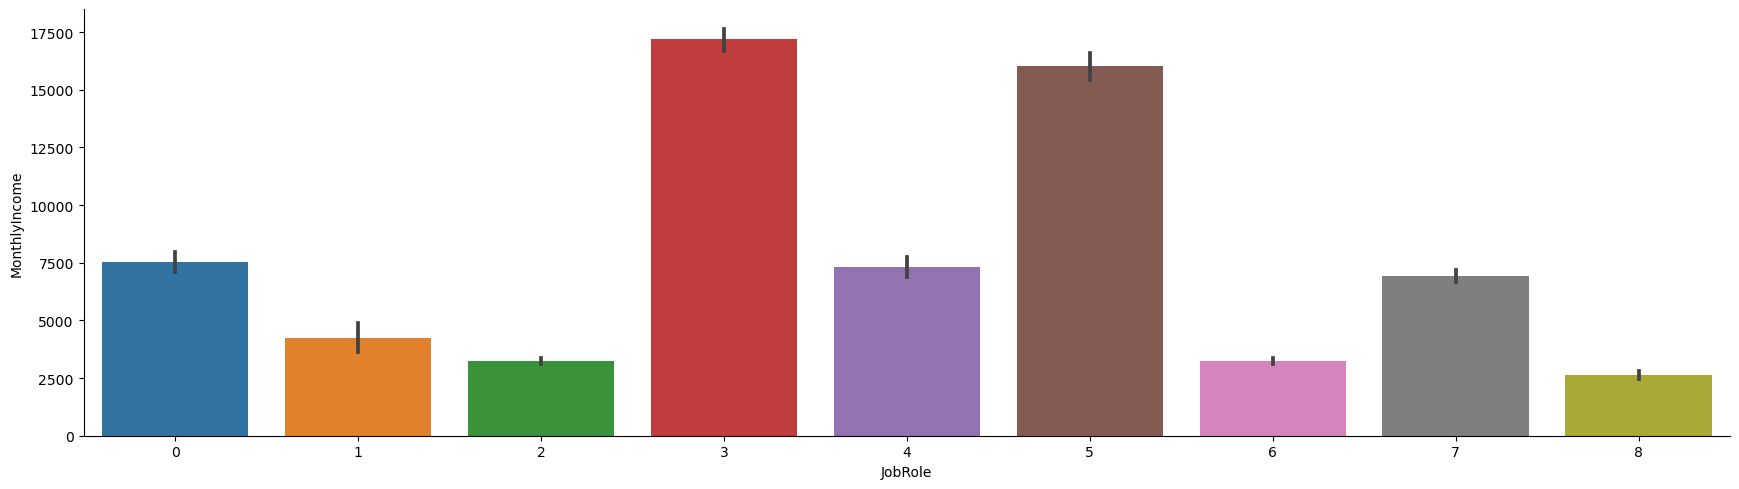

In [28]:
sns.factorplot(x = 'JobRole', y='MonthlyIncome', kind = 'bar', data=df, aspect = 3.5)

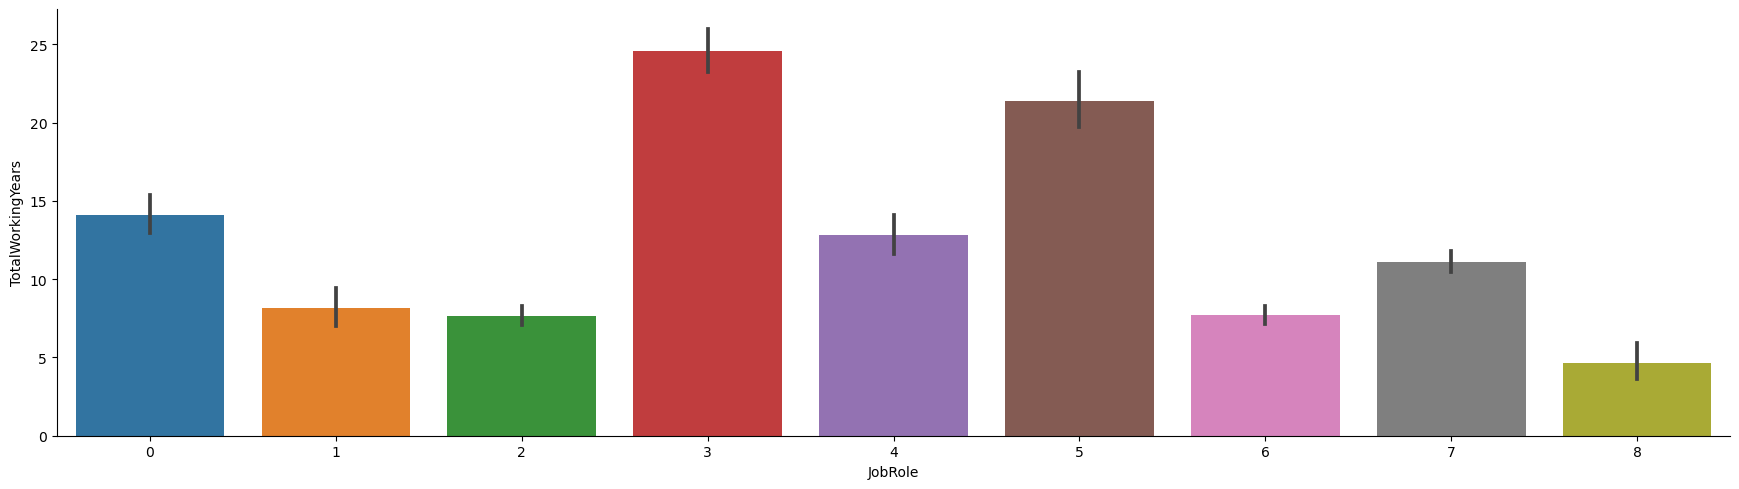

In [29]:
sns.factorplot(x = 'JobRole', y='TotalWorkingYears', kind = 'bar', data=df, aspect = 3.5)

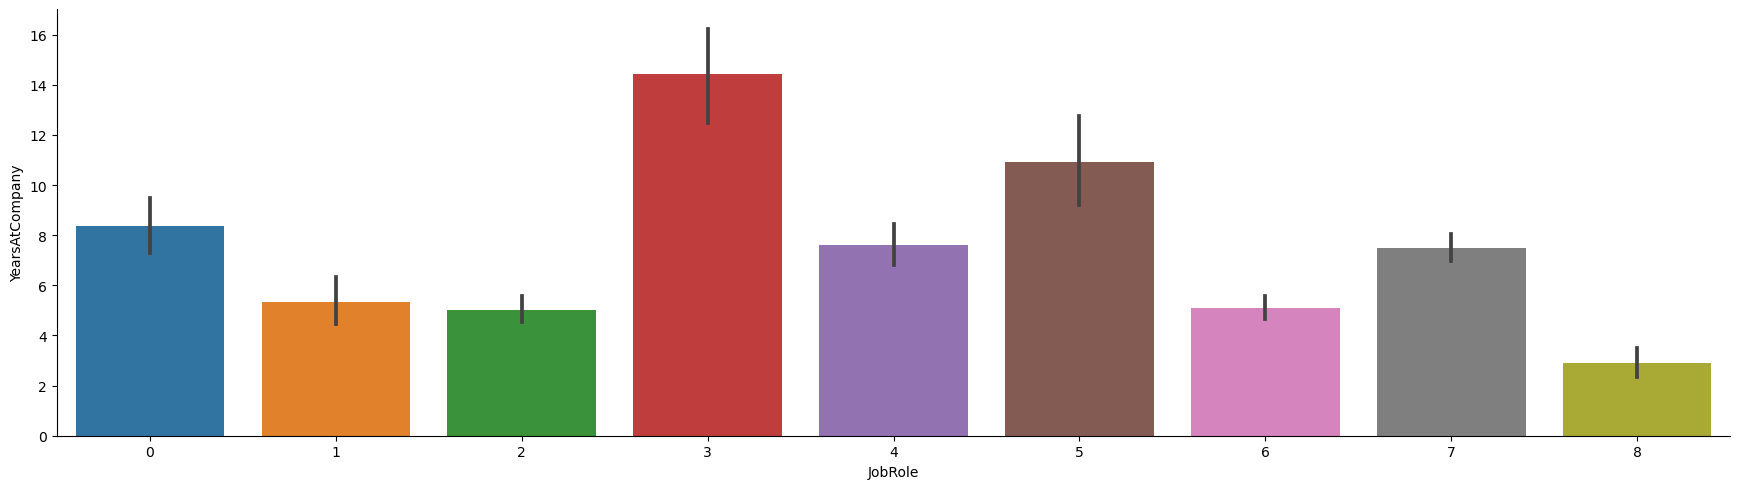

In [30]:
sns.factorplot(x = 'JobRole', y='YearsAtCompany', kind = 'bar', data=df, aspect = 3.5)

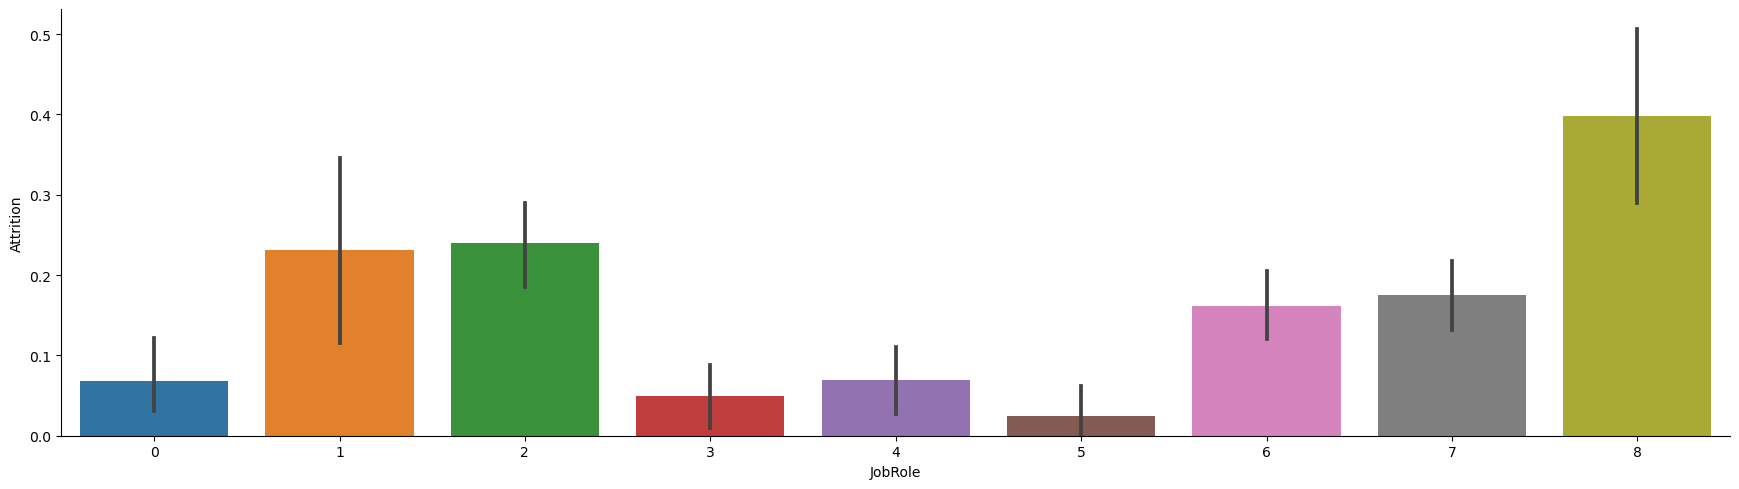

In [31]:
sns.factorplot(x = 'JobRole', y="Attrition", kind = 'bar', data=df, aspect = 3.5)

Data Transformation and derivation of new attributes if necessary

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [33]:
data = df.copy()

In [34]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

Create dummies and interaction terms

In [35]:
data.describe()

Age  BusinessTravel   Department  DistanceFromHome  \
count  1470.000000     1470.000000  1470.000000       1470.000000   
mean     36.923810        1.607483     1.260544          9.192517   
std       9.135373        0.665455     0.527792          8.106864   
min      18.000000        0.000000     0.000000          1.000000   
25%      30.000000        1.000000     1.000000          2.000000   
50%      36.000000        2.000000     1.000000          7.000000   
75%      43.000000        2.000000     2.000000         14.000000   
max      60.000000        2.000000     2.000000         29.000000   

         Education  EducationField  EnvironmentSatisfaction       Gender  \
count  1470.000000     1470.000000              1470.000000  1470.000000   
mean      2.912925        2.247619                 2.721769     0.600000   
std       1.024165        1.331369                 1.093082     0.490065   
min       1.000000        0.000000                 1.000000     0.000000   
25%       2.000000        1.000000                 2.000000     0.000000   
50%       3.000000        2.000000                 3.000000     1.000000   
75%       4.000000        3.000000                 4.000000     1.000000   
max       5.000000        5.000000                 4.000000     1.000000   

        HourlyRate  JobInvolvement  ...  PerformanceRating  \
count  1470.000000     1470.000000  ...        1470.000000   
mean     65.891156        2.729932  ...           3.153741   
std      20.329428        0.711561  ...           0.360824   
min      30.000000        1.000000  ...           3.000000   
25%      48.000000        2.000000  ...           3.000000   
50%      66.000000        3.000000  ...           3.000000   
75%      83.750000        3.000000  ...           3.000000   
max     100.000000        4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 27 columns]

In [36]:
data.dtypes

Age                         int64
Attrition                    bool
BusinessTravel              int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                     bool
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [37]:
data=data.drop(['BusinessTravel','JobRole'],axis=1)

In [38]:
data=data.drop(['Department','EducationField','MaritalStatus'],axis=1)

In [39]:
data['Attrition'] = data['Attrition'].astype('int')
data['Gender'] = data['Gender'].astype('int')
data['OverTime'] = data['OverTime'].astype('int')

In [40]:
data.dtypes

Age                         int64
Attrition                   int32
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [41]:
data.shape

(1470, 24)

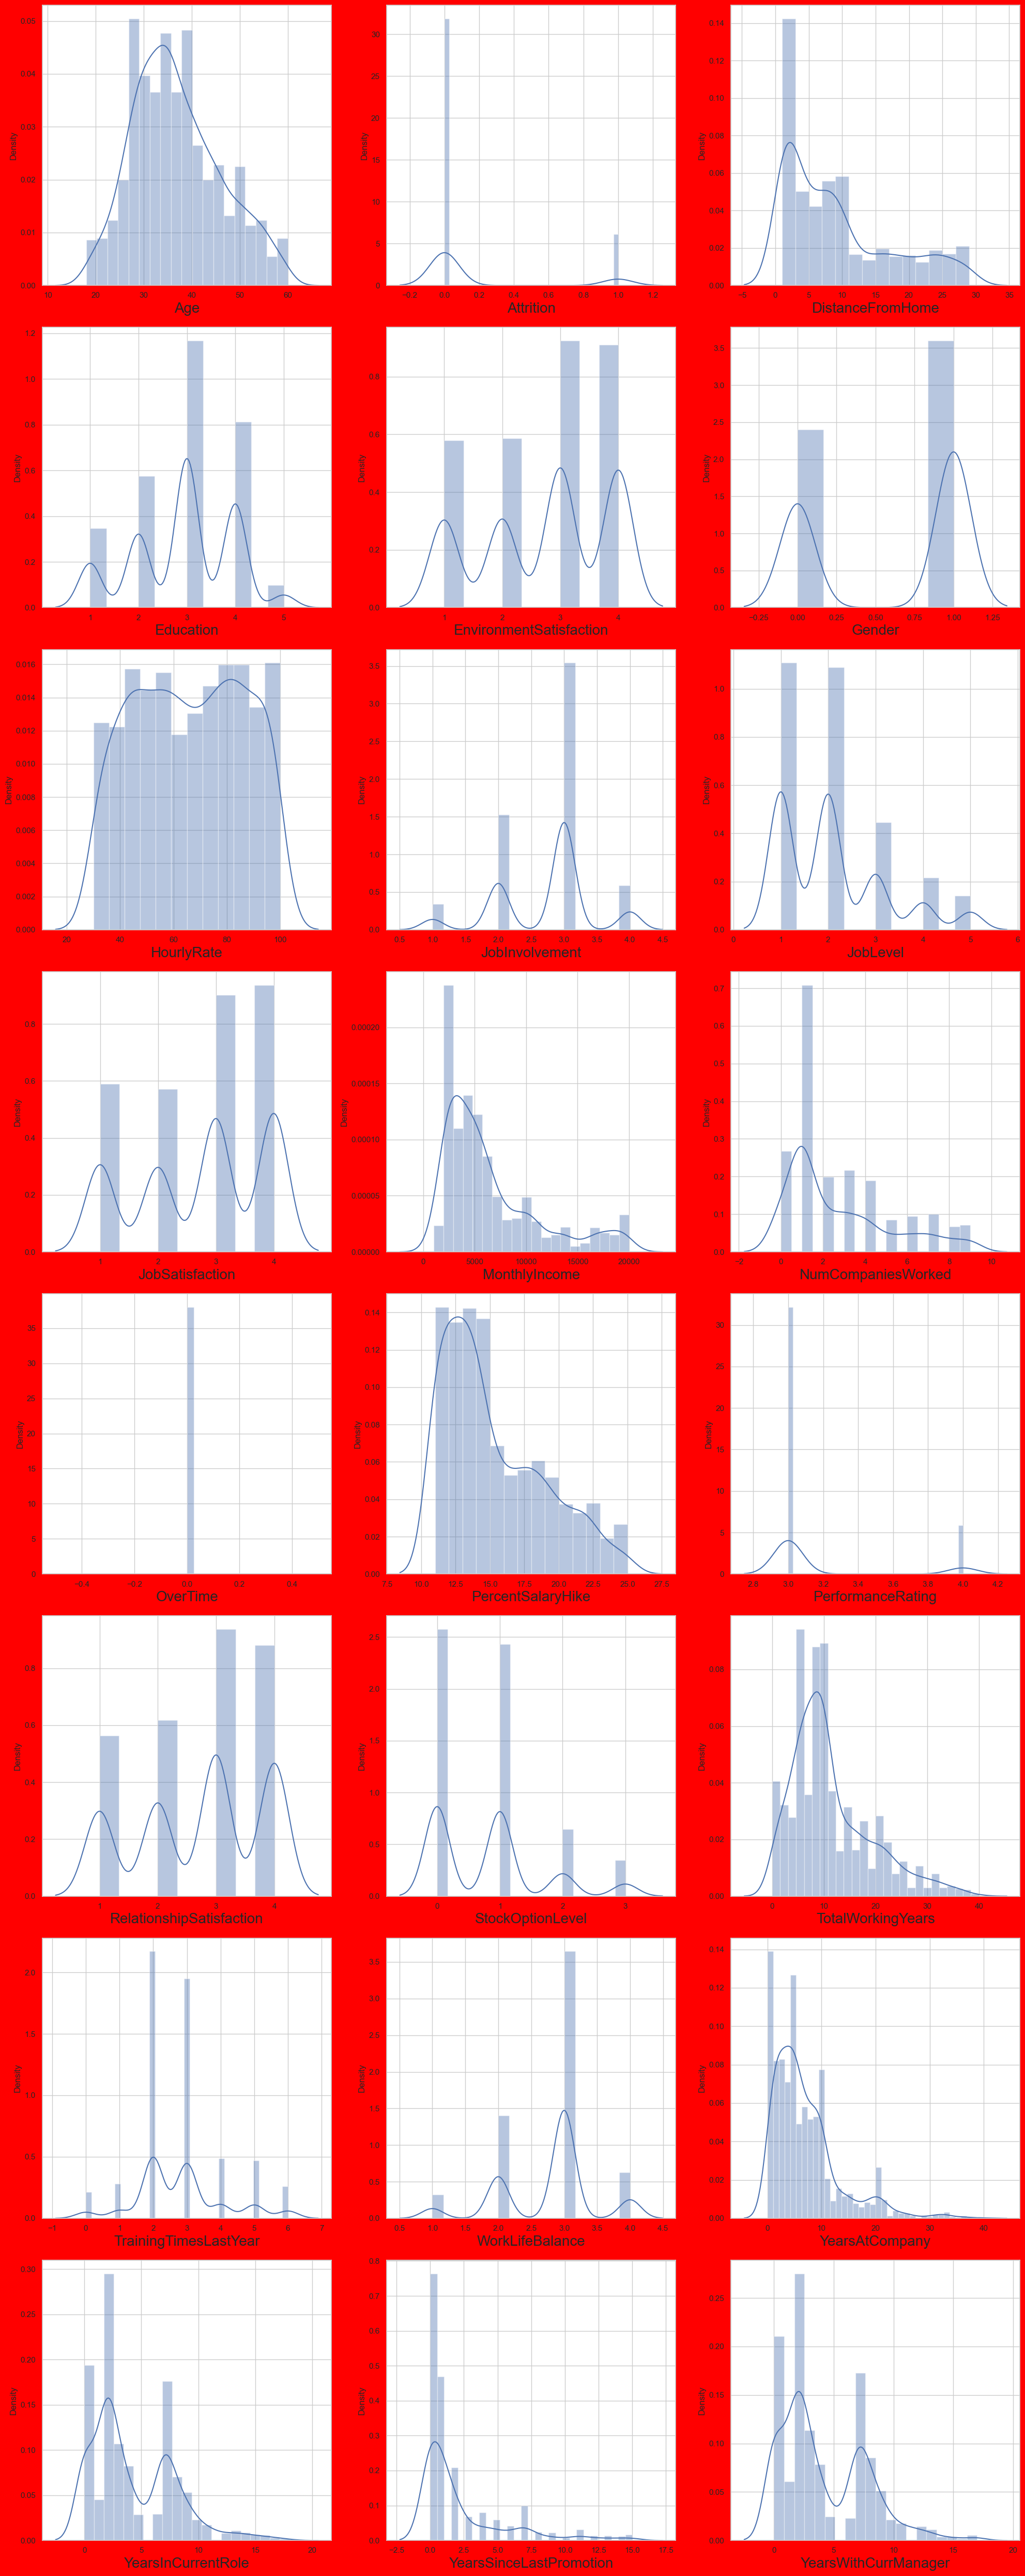

In [42]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [43]:
df_feature = data.drop('JobLevel', axis = 1)
data.shape

(1470, 24)

Visualize the Outliers Using Boxplot

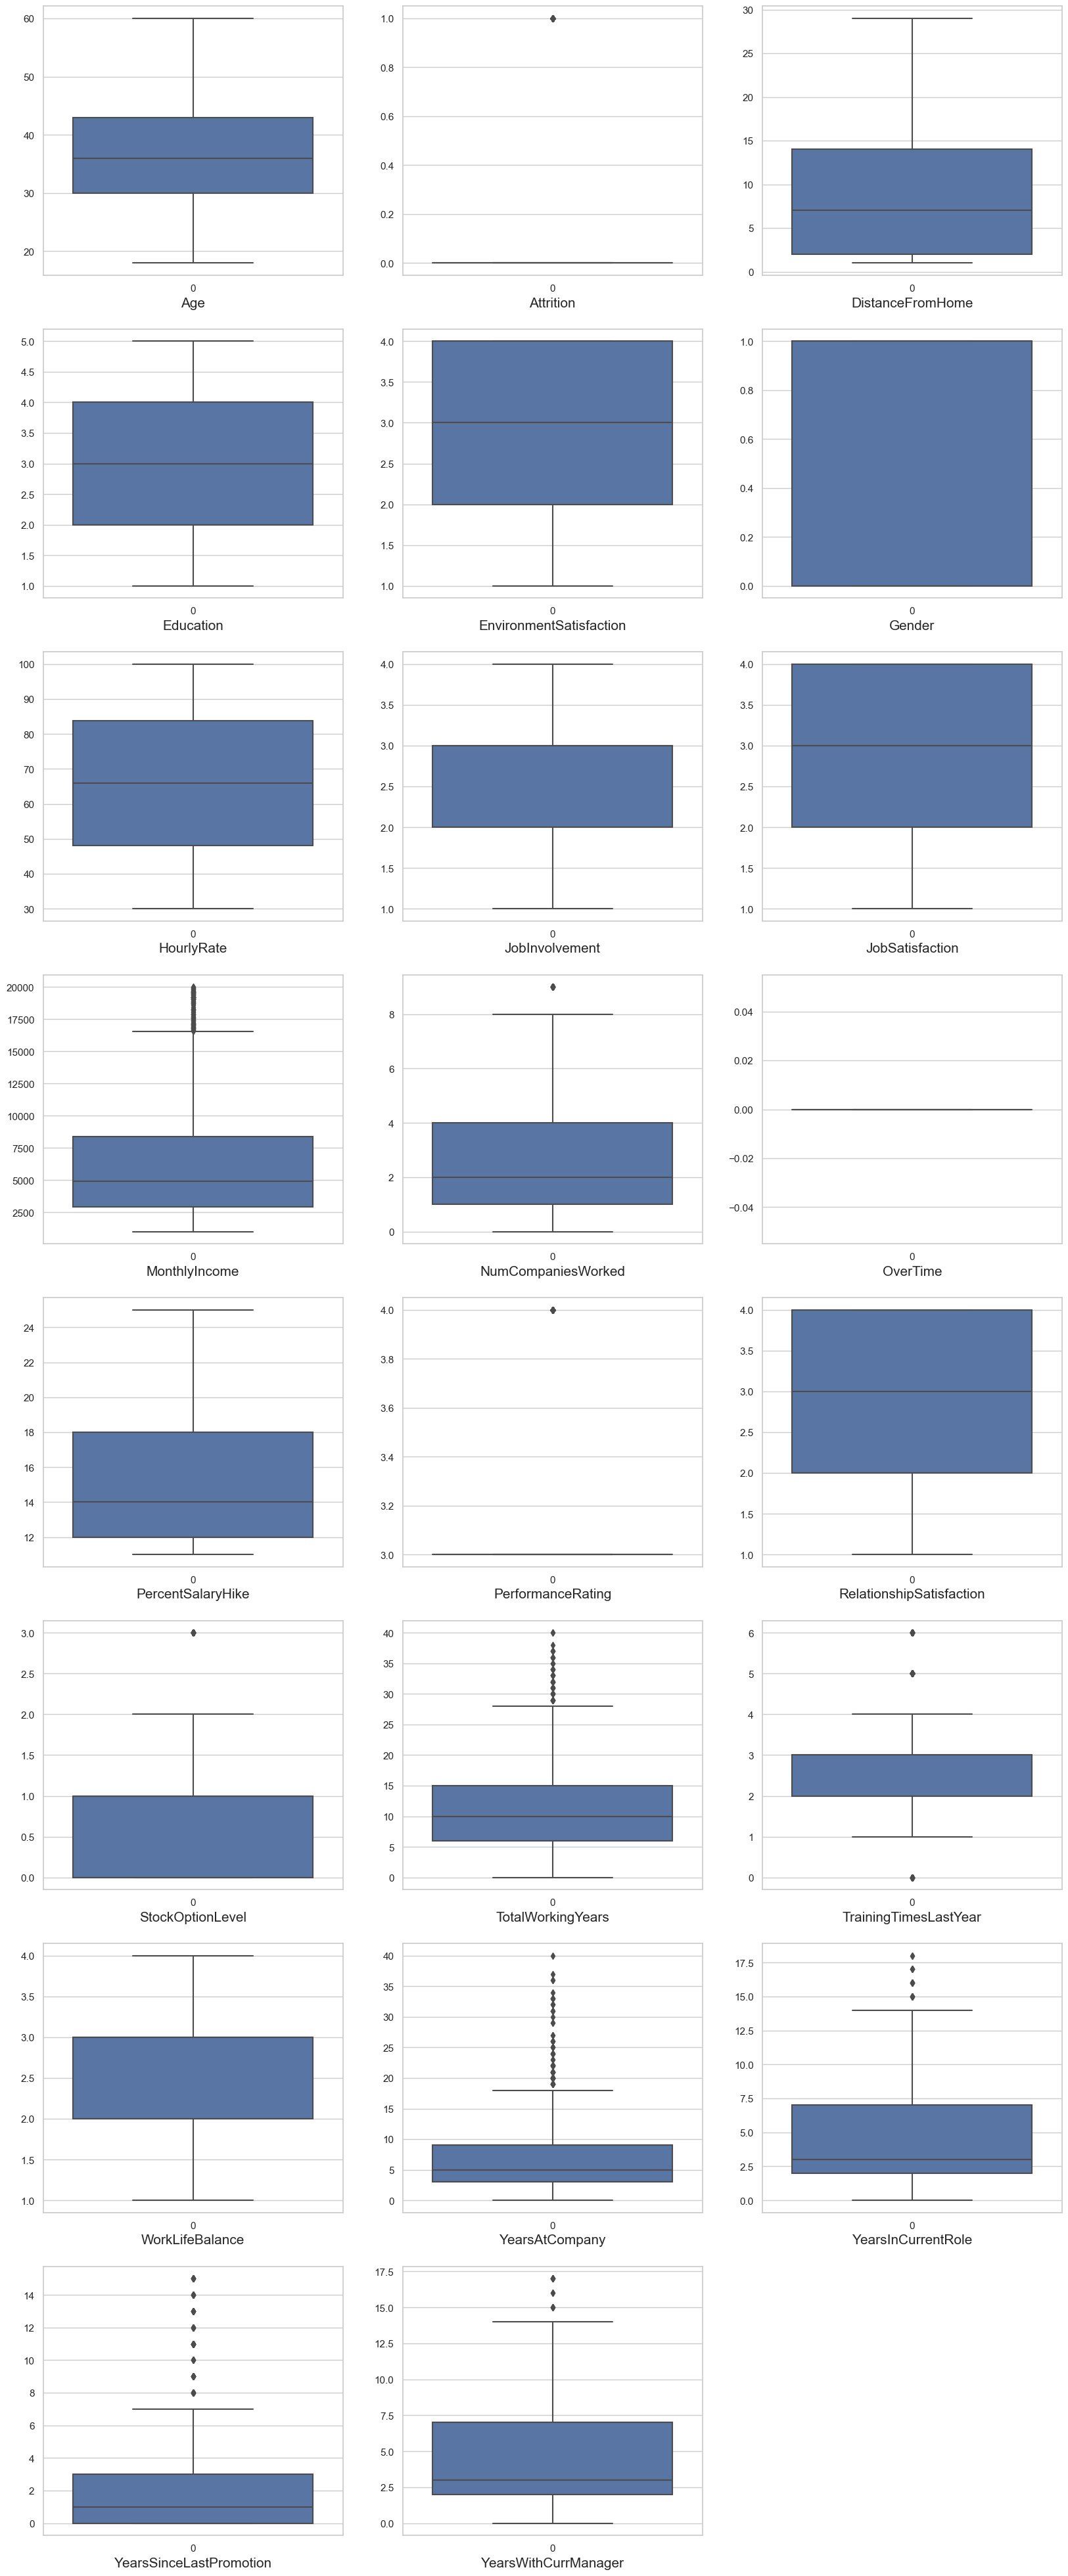

In [44]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,50))
graph = 1

for column in df_feature:
    if graph<=24:
        plt.subplot(8,3,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [45]:
data.shape

(1470, 24)

In [46]:
# find the IQR to identify outliers

#1st Quantile

Q1 = data.quantile(0.25)

# 3rd Quantile

Q3 = data.quantile(0.78)

#IQR ( Inter Quantile Range)

IQR = Q3-Q1

In [47]:
#validating one outlier
preg_high = (Q3.YearsAtCompany + (1.5*IQR.YearsAtCompany))
preg_high

20.5

In [48]:
# Check the indexes whcih have higher values
index = np.where(data['YearsAtCompany']>preg_high)
index

(array([  18,   28,   45,   62,   63,   90,   98,  119,  126,  178,  187,
         190,  231,  237,  244,  257,  270,  300,  311,  314,  326,  390,
         400,  411,  425,  473,  477,  535,  538,  544,  561,  584,  592,
         595,  653,  677,  738,  746,  749,  753,  799,  838,  861,  907,
         913,  914,  918,  922,  926,  962, 1086, 1096, 1111, 1116, 1135,
        1138, 1140, 1221, 1223, 1225, 1242, 1295, 1303, 1331, 1351, 1443],
       dtype=int64),)

In [49]:
data= data.drop(data.index[index])
data.shape

(1404, 24)

In [50]:
data.reset_index()

index  Age  Attrition  DistanceFromHome  Education  \
0         0   41          1                 1          2   
1         1   49          0                 8          1   
2         2   37          1                 2          2   
3         3   33          0                 3          4   
4         4   27          0                 2          1   
...     ...  ...        ...               ...        ...   
1399   1465   36          0                23          2   
1400   1466   39          0                 6          1   
1401   1467   27          0                 4          3   
1402   1468   49          0                 2          3   
1403   1469   34          0                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1399                        3       1          41               4         2   
1400                        4       1          42               2         3   
1401                        2       1          87               4         2   
1402                        4       1          63               2         2   
1403                        2       1          82               4         2   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1399  ...                  3                         3                 1   
1400  ...                  3                         1                 1   
1401  ...                  4                         2                 1   
1402  ...                  3                         4                 0   
1403  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1399                 17                      3                3   
1400                  9                      5                3   
1401                  6                      0                3   
1402                 17                      3                2   
1403                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1399               5                   2                        0   
1400               7                   7                        1 

In [51]:
#validating one outlier
preg_high = (Q3.TotalWorkingYears + (1.5*IQR.TotalWorkingYears))
preg_high

31.0

In [52]:
# Check the indexes whcih have higher values
index = np.where(data['TotalWorkingYears']>preg_high)
index

(array([  80,  220,  378,  400,  420,  507,  590,  615,  678,  824,  847,
         851,  907,  926,  959,  993, 1127, 1203, 1239, 1336], dtype=int64),)

In [53]:
data= data.drop(data.index[index])
data.shape

(1384, 24)

In [54]:
data.reset_index()

index  Age  Attrition  DistanceFromHome  Education  \
0         0   41          1                 1          2   
1         1   49          0                 8          1   
2         2   37          1                 2          2   
3         3   33          0                 3          4   
4         4   27          0                 2          1   
...     ...  ...        ...               ...        ...   
1379   1465   36          0                23          2   
1380   1466   39          0                 6          1   
1381   1467   27          0                 4          3   
1382   1468   49          0                 2          3   
1383   1469   34          0                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1379                        3       1          41               4         2   
1380                        4       1          42               2         3   
1381                        2       1          87               4         2   
1382                        4       1          63               2         2   
1383                        2       1          82               4         2   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1379  ...                  3                         3                 1   
1380  ...                  3                         1                 1   
1381  ...                  4                         2                 1   
1382  ...                  3                         4                 0   
1383  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1379                 17                      3                3   
1380                  9                      5                3   
1381                  6                      0                3   
1382                 17                      3                2   
1383                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1379               5                   2                        0   
1380               7                   7                        1 

In [55]:
preg_high = (Q3.YearsInCurrentRole + (1.5*IQR.YearsInCurrentRole))
preg_high

14.5

In [56]:
# Check the indexes whcih have higher values
index = np.where(data['YearsInCurrentRole']>preg_high)
index

(array([ 114,  262,  390,  436,  671,  959, 1077, 1083, 1245, 1345],
       dtype=int64),)

In [57]:
data= data.drop(data.index[index])
data.shape

(1374, 24)

In [58]:
data.reset_index()

index  Age  Attrition  DistanceFromHome  Education  \
0         0   41          1                 1          2   
1         1   49          0                 8          1   
2         2   37          1                 2          2   
3         3   33          0                 3          4   
4         4   27          0                 2          1   
...     ...  ...        ...               ...        ...   
1369   1465   36          0                23          2   
1370   1466   39          0                 6          1   
1371   1467   27          0                 4          3   
1372   1468   49          0                 2          3   
1373   1469   34          0                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1369                        3       1          41               4         2   
1370                        4       1          42               2         3   
1371                        2       1          87               4         2   
1372                        4       1          63               2         2   
1373                        2       1          82               4         2   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1369  ...                  3                         3                 1   
1370  ...                  3                         1                 1   
1371  ...                  4                         2                 1   
1372  ...                  3                         4                 0   
1373  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1369                 17                      3                3   
1370                  9                      5                3   
1371                  6                      0                3   
1372                 17                      3                2   
1373                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1369               5                   2                        0   
1370               7                   7                        1 

In [59]:
#validating one outlier
preg_high = (Q3.MonthlyIncome + (1.5*IQR.MonthlyIncome))
preg_high

19035.35

In [60]:
# Check the indexes whcih have higher values
index = np.where(data['MonthlyIncome']>preg_high)
index

(array([  24,  154,  259,  366,  461,  527,  712,  716,  759,  795,  811,
         838,  889, 1050, 1053, 1074, 1190, 1239, 1284, 1342], dtype=int64),)

In [61]:
data= data.drop(data.index[index])
data.shape

(1354, 24)

In [62]:
data.reset_index()

index  Age  Attrition  DistanceFromHome  Education  \
0         0   41          1                 1          2   
1         1   49          0                 8          1   
2         2   37          1                 2          2   
3         3   33          0                 3          4   
4         4   27          0                 2          1   
...     ...  ...        ...               ...        ...   
1349   1465   36          0                23          2   
1350   1466   39          0                 6          1   
1351   1467   27          0                 4          3   
1352   1468   49          0                 2          3   
1353   1469   34          0                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1349                        3       1          41               4         2   
1350                        4       1          42               2         3   
1351                        2       1          87               4         2   
1352                        4       1          63               2         2   
1353                        2       1          82               4         2   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1349  ...                  3                         3                 1   
1350  ...                  3                         1                 1   
1351  ...                  4                         2                 1   
1352  ...                  3                         4                 0   
1353  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1349                 17                      3                3   
1350                  9                      5                3   
1351                  6                      0                3   
1352                 17                      3                2   
1353                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1349               5                   2                        0   
1350               7                   7                        1 

In [63]:
#validating one outlier
preg_high = (Q3.YearsSinceLastPromotion + (1.5*IQR.YearsSinceLastPromotion))
preg_high

7.5

In [64]:
# Check the indexes whcih have higher values
index = np.where(data['YearsSinceLastPromotion']>preg_high)
index

(array([  15,   42,   51,   57,   58,   81,   85,  101,  172,  178,  194,
         202,  231,  248,  249,  287,  292,  298,  306,  356,  358,  368,
         391,  406,  461,  462,  467,  473,  485,  636,  641,  647,  673,
         691,  693,  723,  750,  805,  806,  859,  872,  873,  879,  883,
         896,  926,  946,  973,  993,  999, 1007, 1114, 1118, 1120, 1238,
        1277, 1290, 1296, 1301, 1312, 1328, 1331, 1346], dtype=int64),)

In [65]:
data= data.drop(data.index[index])
data.shape

(1291, 24)

In [66]:
data.reset_index()

index  Age  Attrition  DistanceFromHome  Education  \
0         0   41          1                 1          2   
1         1   49          0                 8          1   
2         2   37          1                 2          2   
3         3   33          0                 3          4   
4         4   27          0                 2          1   
...     ...  ...        ...               ...        ...   
1286   1465   36          0                23          2   
1287   1466   39          0                 6          1   
1288   1467   27          0                 4          3   
1289   1468   49          0                 2          3   
1290   1469   34          0                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1286                        3       1          41               4         2   
1287                        4       1          42               2         3   
1288                        2       1          87               4         2   
1289                        4       1          63               2         2   
1290                        2       1          82               4         2   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1286  ...                  3                         3                 1   
1287  ...                  3                         1                 1   
1288  ...                  4                         2                 1   
1289  ...                  3                         4                 0   
1290  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1286                 17                      3                3   
1287                  9                      5                3   
1288                  6                      0                3   
1289                 17                      3                2   
1290                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1286               5                   2                        0   
1287               7                   7                        1 

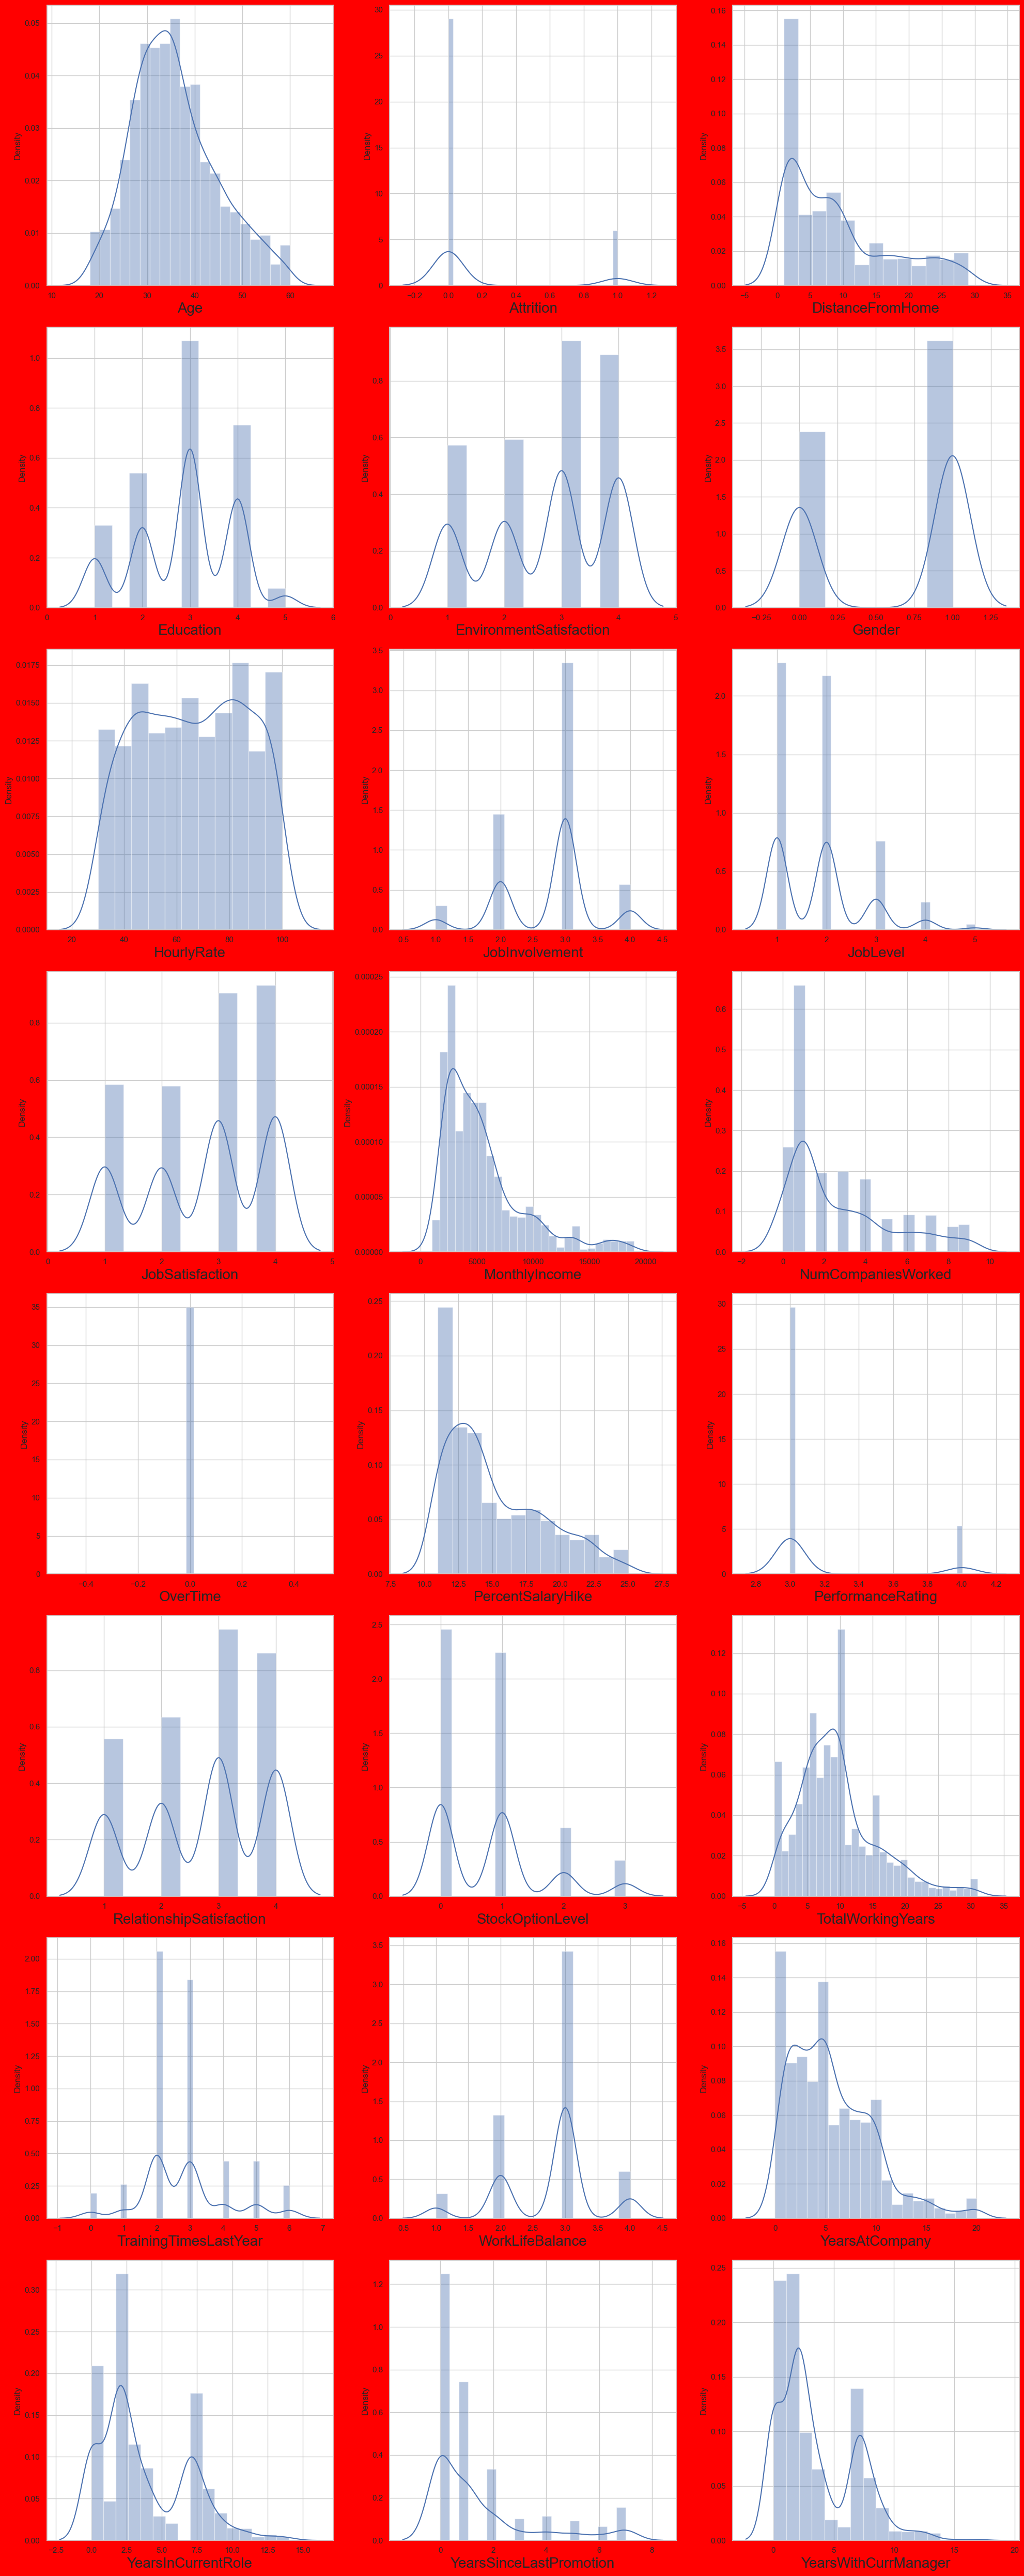

In [67]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

Visualize the Outliers After removing Some Outliers

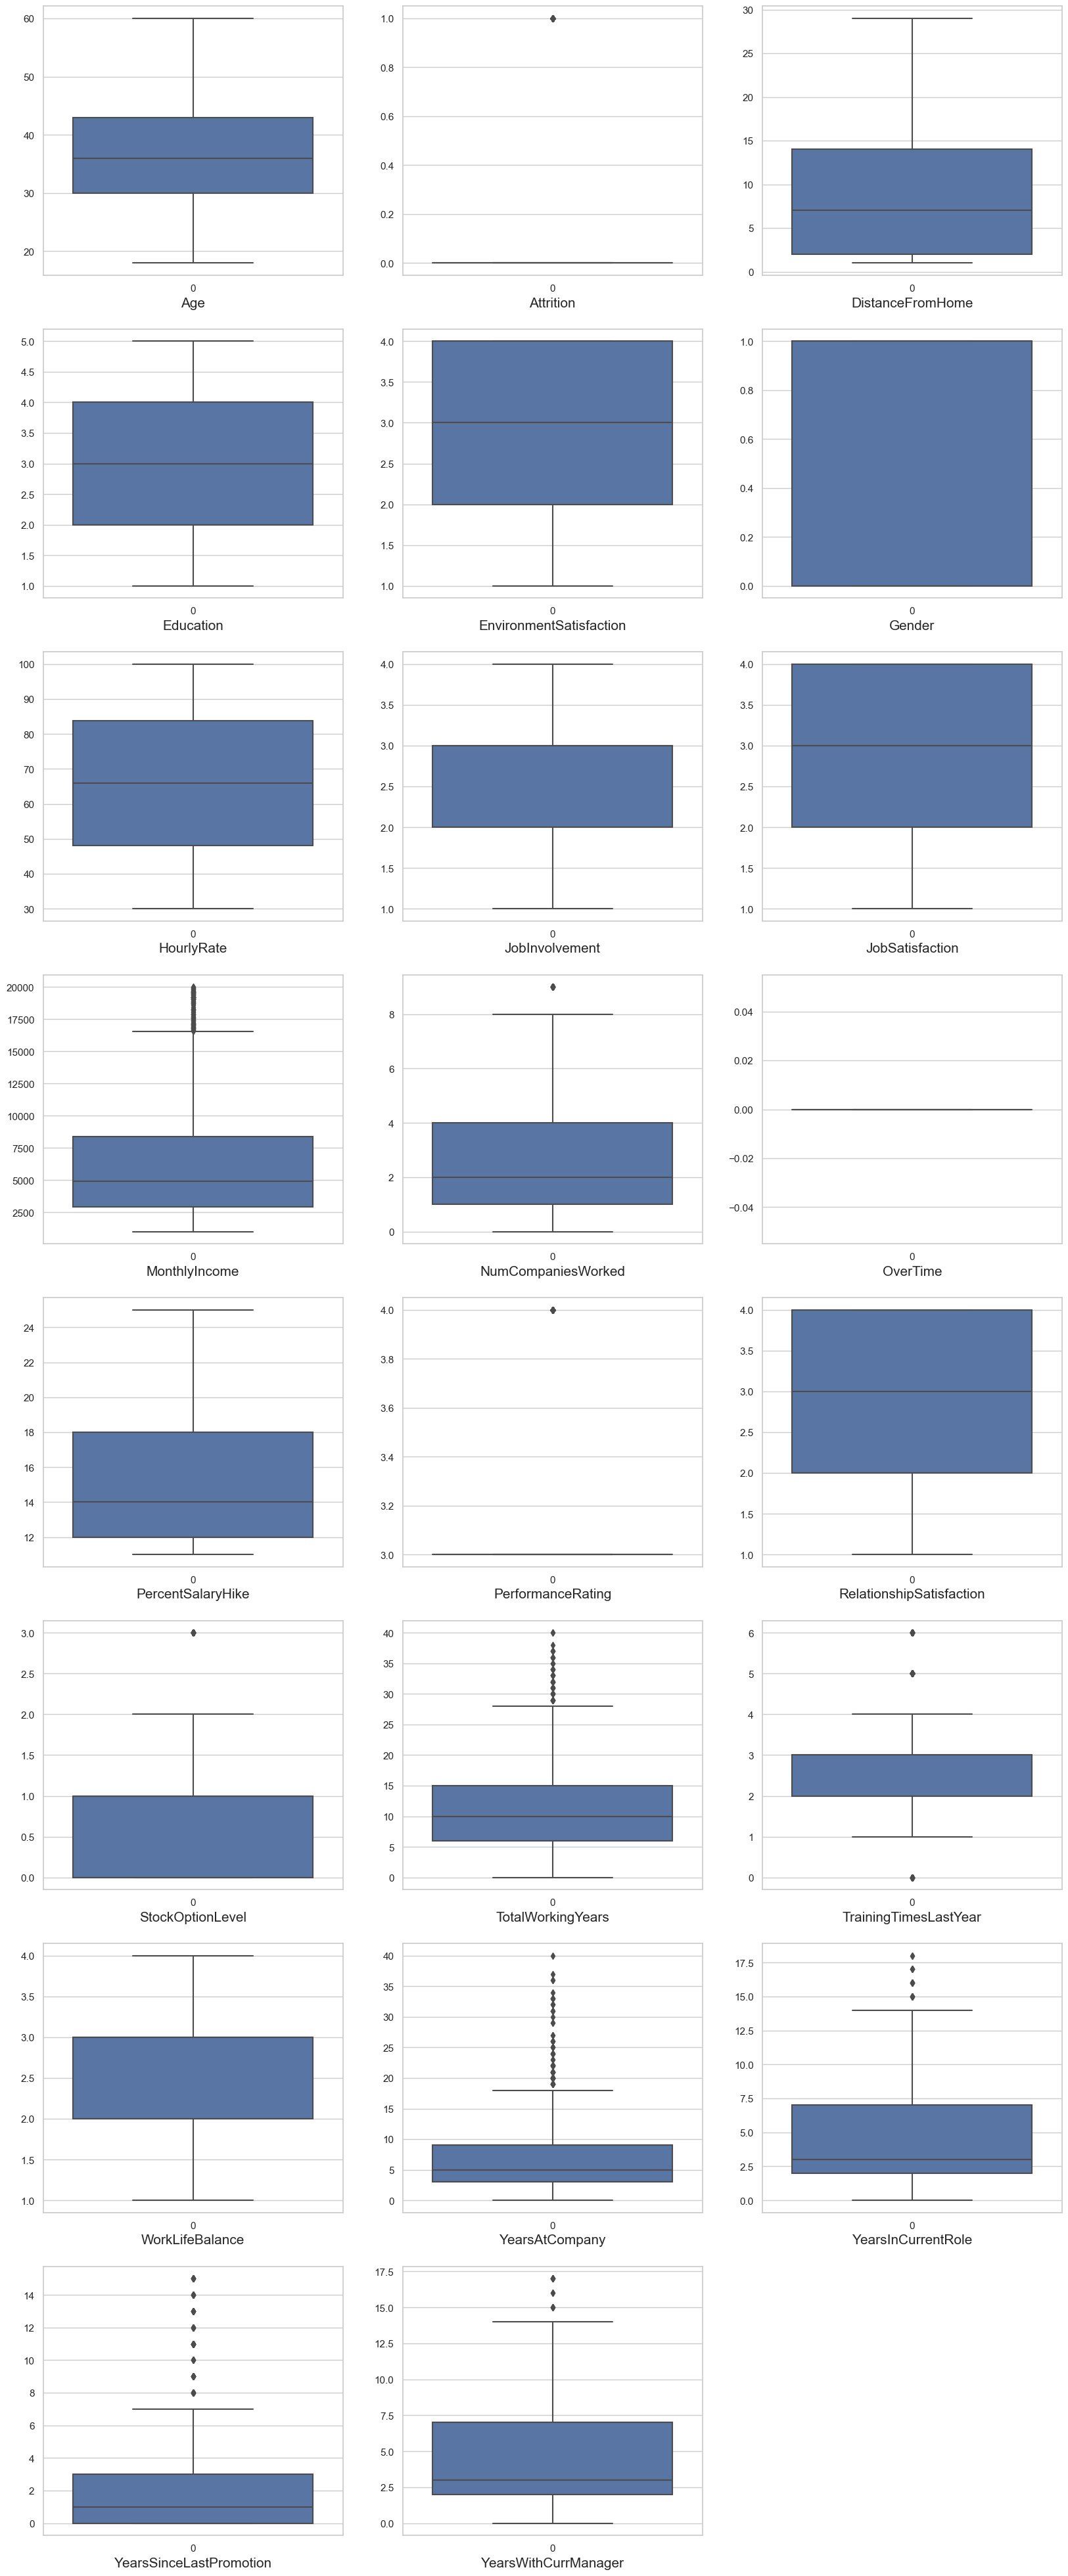

In [68]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,50))
graph = 1

for column in df_feature:
    if graph<=24:
        plt.subplot(8,3,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Data Standarization and Normalization

In [69]:
#Finding relationship we want to keep only those feature which have relationship with labels
X = data.drop(columns = ["Attrition"])
y = data["Attrition"]

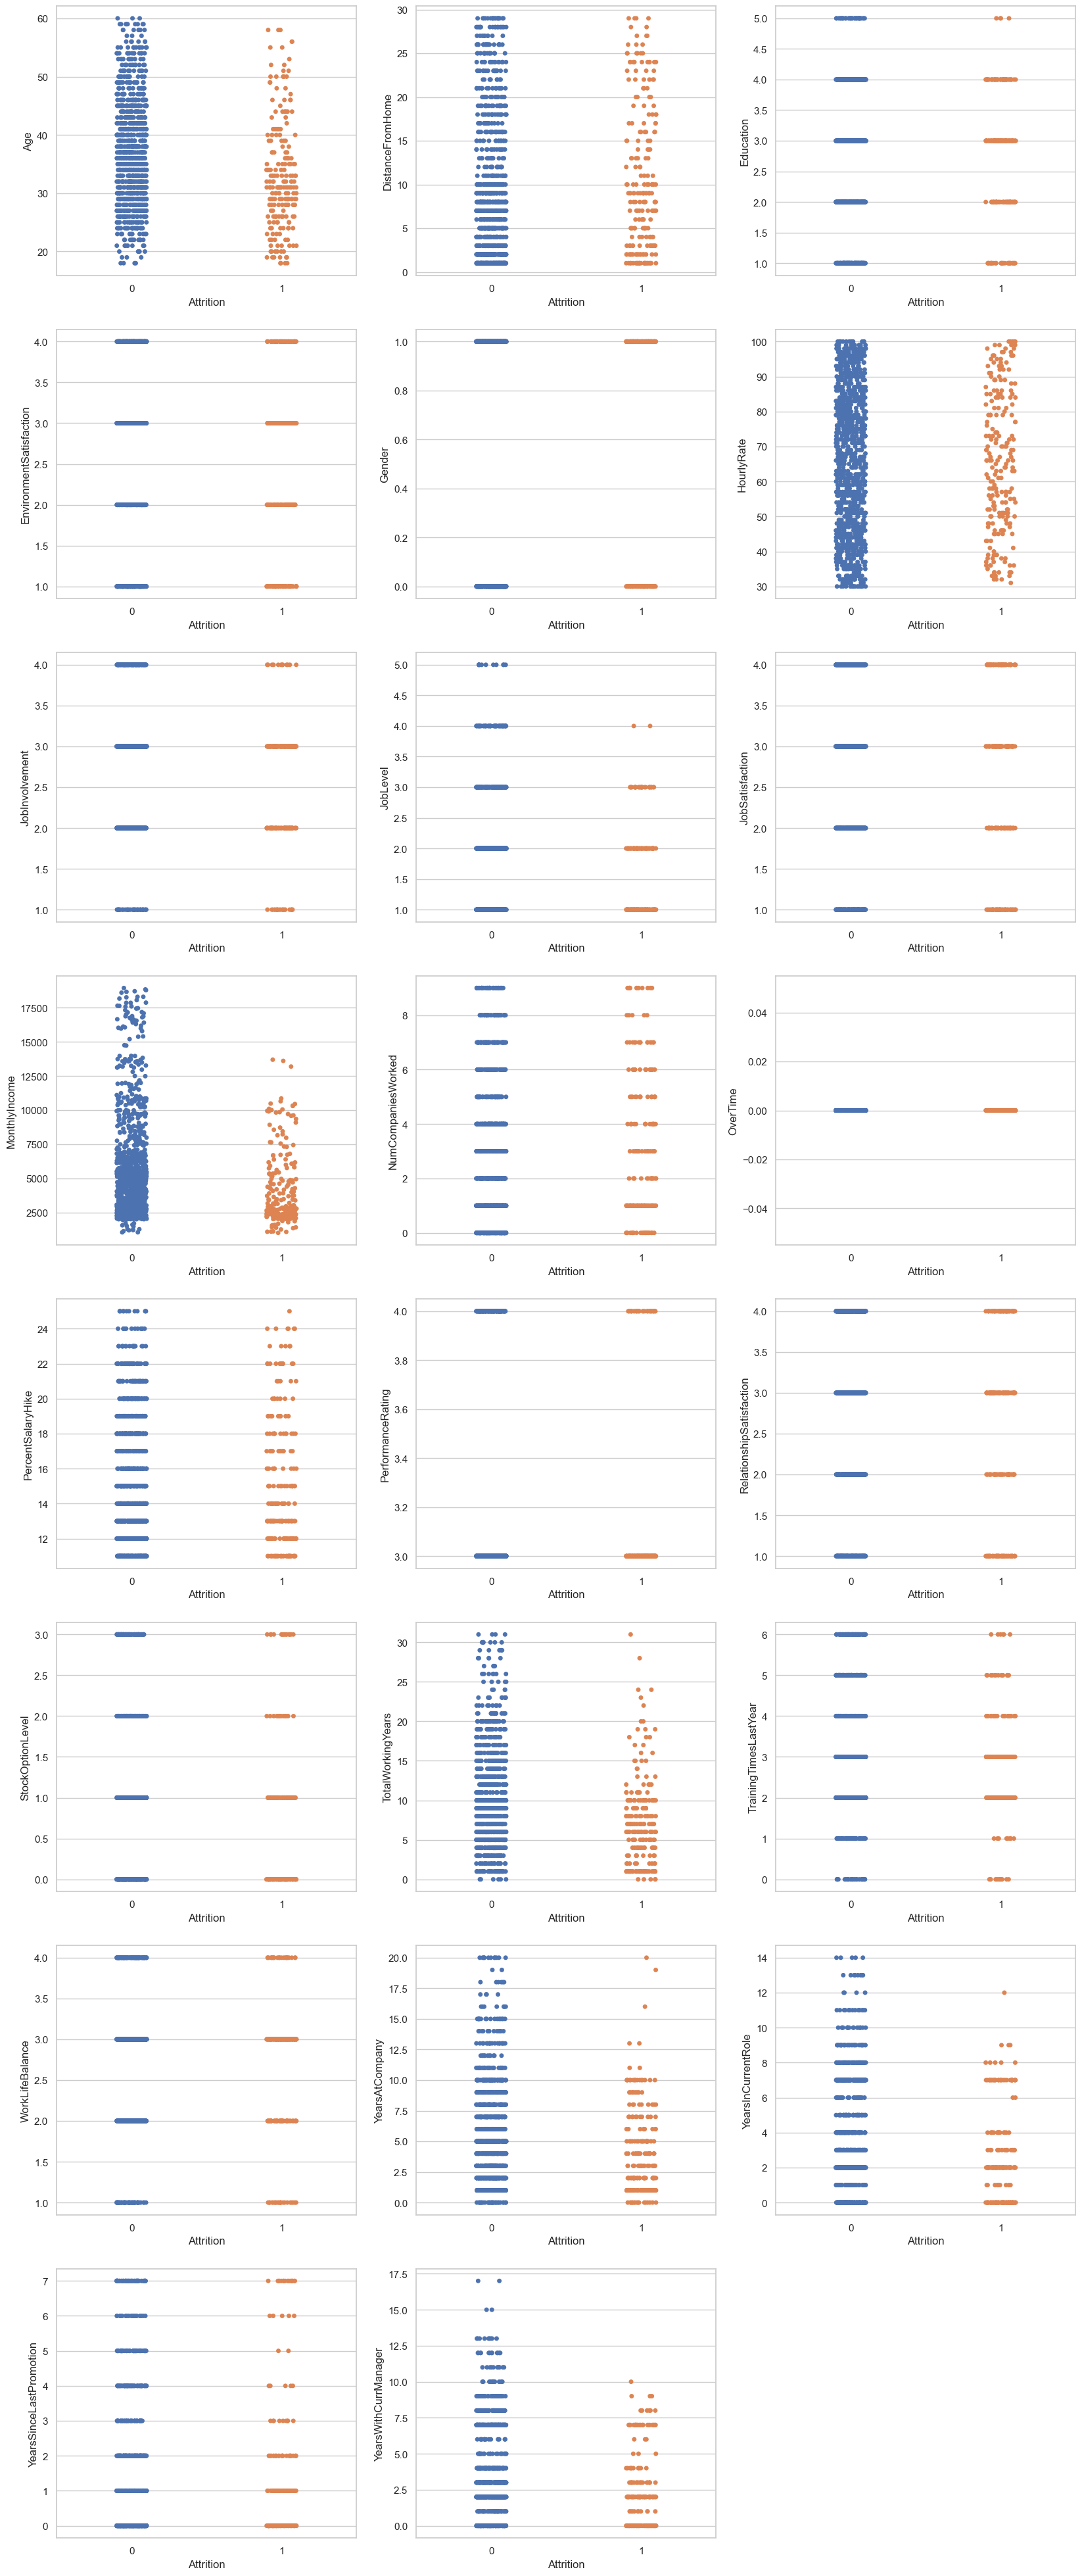

In [70]:
plt.figure(figsize =(20,50))
graph = 1

for column in X:
    if graph<=24:
        ax =plt.subplot(8,3,graph)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [71]:
# Check multicollinearity problem Find if one feature is dependent on another feature
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.25, random_state = 355)

In [73]:
def metric_score (clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n =================Train Result=====================")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print("\n==================Test Result=======================")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n Test Classification Report\n",classification_report(y_test,pred,digits=2))

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Model Confidence / Accuracy
#Initiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [76]:
# Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
#Call The Function
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test, train = False)



 =================Train Result=====================
Accuracy Score : 85.64%

==================Test Result=======================
Accuracy Score : 85.76%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       276
           1       0.53      0.17      0.26        47

    accuracy                           0.86       323
   macro avg       0.70      0.57      0.59       323
weighted avg       0.82      0.86      0.82       323



In [78]:
from sklearn.model_selection import KFold, cross_val_score

In [79]:
k_f = KFold(n_splits = 3)

In [80]:
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [81]:
#for train, test in k_f.split([1,2,3,4,5,6,7,8,9]):
  #  print("Train : ",train,'Test : ',test)

In [82]:
#Cross Validation Score to check if the model is overfitting 
cross_val_score(knn, X_scalar,y,cv = 5)
cross_val_score(knn,X_scalar,y,cv = 5).mean()

0.8334650264882824

##### using GridSearchCV for the bet parameter to improve the accuracy

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' : [3,5,7,9,11,13]
             }

In [85]:
gridsearch = GridSearchCV(estimator = knn,param_grid = param_grid)

In [86]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [87]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [88]:
# We will use the parameters in our K-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree',leaf_size =3,n_neighbors = 7)


In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [90]:
# call the function and pass dataset to check train and test score
# This is for Training Score
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(knn,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 84.19%

==================Test Result=======================
Accuracy Score : 86.69%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       276
           1       0.70      0.15      0.25        47

    accuracy                           0.87       323
   macro avg       0.79      0.57      0.59       323
weighted avg       0.85      0.87      0.83       323



In [91]:
# If we want to check the confustion_matrix we can check
y_pred = knn.predict(x_test)
cfm = confusion_matrix (y_test,y_pred)
cfm

array([[273,   3],
       [ 40,   7]], dtype=int64)

In [92]:
X_scalar.shape[0]

1291

In [93]:
#Finding Variance inflation factor in each scaled columns
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scalar,i) for i in range (X_scalar.shape[1])]
vif["features"]=X.columns
vif

vif                  features
0   1.764172                       Age
1   1.019450          DistanceFromHome
2   1.065841                 Education
3   1.016516   EnvironmentSatisfaction
4   1.018870                    Gender
5   1.018773                HourlyRate
6   1.011629            JobInvolvement
7   7.060158                  JobLevel
8   1.014187           JobSatisfaction
9   6.774617             MonthlyIncome
10  1.247954        NumCompaniesWorked
11       NaN                  OverTime
12  2.452137         PercentSalaryHike
13  2.447041         PerformanceRating
14  1.012297  RelationshipSatisfaction
15  1.018953          StockOptionLevel
16  3.332740         TotalWorkingYears
17  1.011196     TrainingTimesLastYear
18  1.015026           WorkLifeBalance
19  5.813783            YearsAtCompany
20  3.512985        YearsInCurrentRole
21  1.307941   YearsSinceLastPromotion
22  3.526216      YearsWithCurrManager

Creation of Train and Test Dataset Using Optimum Parameters

In [94]:
#Now Split our data in test and training set
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.25, random_state = 355)

In [95]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [96]:
#Let's see how well our model perform on the test data set
x_test

array([[-1.00584184, -0.40359895,  1.08825672, ..., -0.21231069,
        -0.72844172, -0.1877948 ],
       [-0.43690484,  2.08112323,  1.08825672, ..., -0.53363907,
         0.28276071, -0.50102876],
       [-0.43690484, -1.02477949,  0.10988665, ...,  1.39433118,
         2.81076677,  1.37837501],
       ...,
       [ 2.40778019,  1.83265101, -0.86848343, ..., -0.21231069,
        -0.2228405 ,  0.12543916],
       [-1.46099145, -0.65207116, -1.8468535 , ..., -0.53363907,
        -0.2228405 , -0.50102876],
       [-0.66447964,  0.09334549,  0.10988665, ..., -0.21231069,
        -0.2228405 ,  0.12543916]])

In [97]:
y_pred = log_reg.predict(x_test)

In [98]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8699690402476781

In [100]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   4],
       [ 38,   9]], dtype=int64)

In [101]:
# Now Calculate recall, Precision, F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       276
           1       0.69      0.19      0.30        47

    accuracy                           0.87       323
   macro avg       0.78      0.59      0.61       323
weighted avg       0.85      0.87      0.84       323



In [102]:
# ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
# Threshold [0] means no innstances predicted, it should be read from 0 to max
print('Threshold = ',thresholds)
print('True Positive Rate = ', tpr)
print("False Positive Rate = ", fpr)

Threshold =  [2 1 0]
True Positive Rate =  [0.         0.19148936 1.        ]
False Positive Rate =  [0.         0.01449275 1.        ]


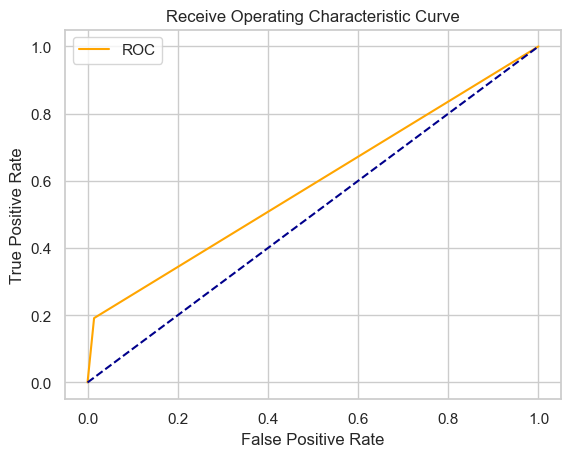

In [103]:
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristic Curve')
plt.legend()
plt.show()

In [104]:
# How much area it is covering (AUC) 
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.5884983040394696


In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [107]:
# Let's check how well models fit on train data
# Adjust r2 Score
regression.score(x_train,y_train)

0.14409554305858707

In [108]:
# Let's check how well models fit the last data 
regression.score(x_test,y_test)

0.1281430154225064

Let's Plot and Visualize

In [109]:
y_pred = regression.predict(x_test)
y_pred

array([ 0.16200385,  0.28956778,  0.17527277,  0.13043447,  0.21155158,
        0.02750566,  0.33583809,  0.01704262,  0.18593838, -0.02123809,
        0.18581265,  0.13955543, -0.00478089,  0.06497187,  0.29330007,
        0.14689196,  0.19860031,  0.08715889,  0.10133584,  0.19108108,
        0.18115391,  0.24894575,  0.03312191,  0.09267083,  0.15681727,
        0.09546643,  0.26821139,  0.53792933,  0.08095956,  0.22934289,
        0.3208876 ,  0.33180841,  0.28364583,  0.0966515 ,  0.24004248,
       -0.152582  ,  0.1862858 ,  0.36939947,  0.32754299, -0.08681191,
        0.04690921,  0.35615256,  0.09098437,  0.12723986,  0.11259282,
        0.3117117 ,  0.18231312,  0.02932231,  0.29904733, -0.05631274,
        0.05108647,  0.26918629,  0.05776711,  0.12273298,  0.1795596 ,
        0.23548302,  0.08177246,  0.2677419 ,  0.31900007,  0.18330648,
        0.07067385,  0.16392566, -0.17437439,  0.09448815,  0.07537862,
        0.11002763,  0.05102641,  0.24479618,  0.24238089,  0.25

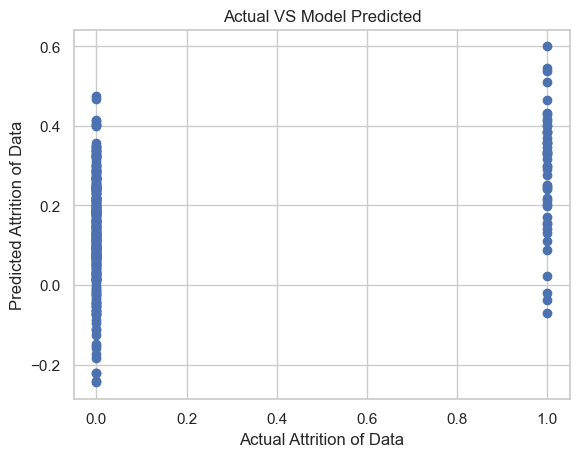

In [110]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Attrition of Data')
plt.ylabel('Predicted Attrition of Data')
plt.title("Actual VS Model Predicted")
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)

In [112]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test,y_pred)

0.24219947710617765

In [113]:
# MSE (Mean Squared Error)
mean_squared_error(y_test,y_pred)

0.10840445900889731

In [114]:
# RMSE (Root Mean Squared Error)
np.sqrt(mean_squared_error(y_test,y_pred))

0.32924832423096295

In [115]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV


In [116]:
#LassoCV will return best alpha after max iteration 
#Normalize is subtracting the mean and dividing by the L2_norm

lassocv = LassoCV(alphas = None, max_iter =100,normalize= True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [117]:
# Best Alpha Parameter
alpha = lassocv.alpha_
alpha

0.00010144415534865308

In [118]:
# Now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010144415534865308)

In [119]:
lasso_reg.score(x_test,y_test)

0.12837068049574185

In [120]:
# Ridge will return best alpha and coefficient after performing 10 cross validation

ridgecv= RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [121]:
ridgecv.alpha_

0.09099999999999998

In [122]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [123]:
ridge_model.score(x_test,y_test)

0.1281518149166161

In [124]:
data.shape

(1291, 24)

In [125]:
data.describe()

Age    Attrition  DistanceFromHome    Education  \
count  1291.000000  1291.000000       1291.000000  1291.000000   
mean     35.839659     0.170411          9.248644     2.887684   
std       8.791725     0.376139          8.052309     1.022504   
min      18.000000     0.000000          1.000000     1.000000   
25%      29.000000     0.000000          2.000000     2.000000   
50%      35.000000     0.000000          7.000000     3.000000   
75%      41.000000     0.000000         14.000000     4.000000   
max      60.000000     1.000000         29.000000     5.000000   

       EnvironmentSatisfaction       Gender   HourlyRate  JobInvolvement  \
count              1291.000000  1291.000000  1291.000000     1291.000000   
mean                  2.717273     0.602634    65.969791        2.738187   
std                   1.086851     0.489543    20.288650        0.708480   
min                   1.000000     0.000000    30.000000        1.000000   
25%                   2.000000     0.000000    48.000000        2.000000   
50%                   3.000000     1.000000    66.000000        3.000000   
75%                   4.000000     1.000000    84.000000        3.000000   
max                   4.000000     1.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  1291.000000      1291.000000  ...        1291.000000   
mean      1.835012         2.727343  ...           3.152595   
std       0.881268         1.100396  ...           0.359736   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       2.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1291.000000       1291.000000        1291.000000   
mean                   2.704105          0.795507           9.604183   
std                    1.075076          0.859968           6.107229   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000           9.000000   
75%                    4.000000          1.000000          12.000000   
max                    4.000000          3.000000          31.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1291.000000      1291.000000     1291.000000   
mean                2.804028         2.760651        5.611154   
std                 1.292620         0.711501        4.074005   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        2.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        8.000000   
max                 6.000000         4.000000       20.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1291.000000              1291.000000           1291.000000  
mean             3.660728                 1.440744              3.599535  
std              3.113287                 1.978610              3.193739  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              1.000000  
50%              2.000000                 1.000000              2.000000  
75%              7.000000                 2.000000              7.000000  
max             14.000000                 7.000000             17.000000  

[8 rows x 24 columns]

In [126]:
data.drop_duplicates()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41          1                 1          2                        2   
1      49          0                 8          1                        3   
2      37          1                 2          2                        4   
3      33          0                 3          4                        4   
4      27          0                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36          0                23          2                        3   
1466   39          0                 6          1                        4   
1467   27          0                 4          3                        2   
1468   49          0                 2          3                        4   
1469   34          0                 8          3                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  ...  \
0          0          94               3         2                4  ...   
1          1          61               2         2                2  ...   
2          1          92               2         1                3  ...   
3          0          56               3         1                3  ...   
4          1          40               3         1                2  ...   
...      ...         ...             ...       ...              ...  ...   
1465       1          41               4         2                4  ...   
1466       1          42               2         3                1  ...   
1467       1          87               4         2                2  ...   
1468       1          63               2         2                2  ...   
1469       1          82               4         2                3  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [127]:
data.shape

(1291, 24)

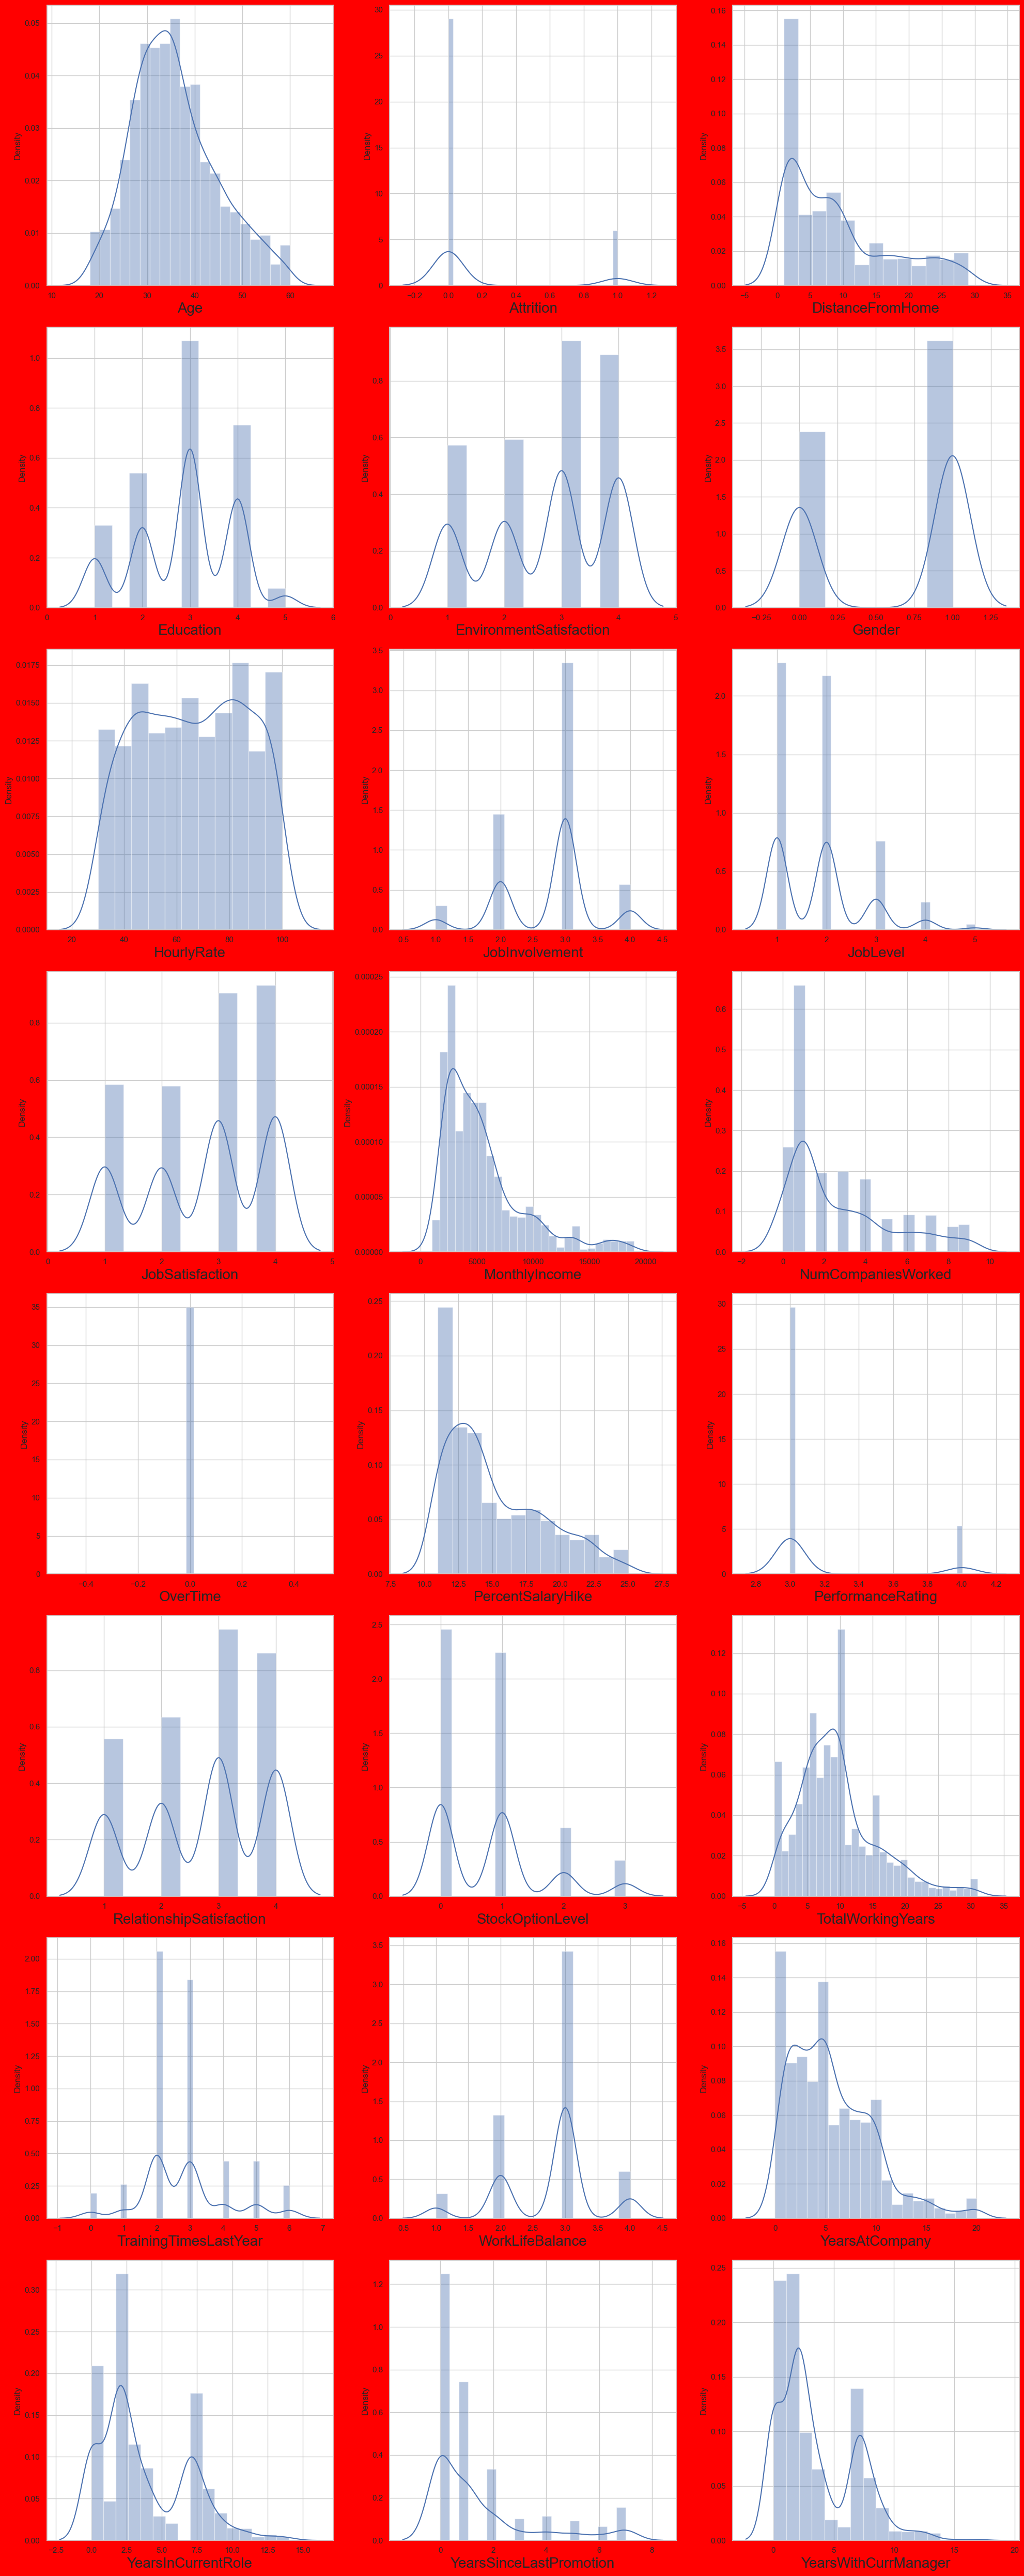

In [128]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [129]:
data.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [130]:
z_score = zscore(data[['Age','DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender','JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])
abs_z_score = np.abs(z_score)
filtering_entry= (abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [131]:
data.describe()

Age    Attrition  DistanceFromHome    Education  \
count  1210.000000  1210.000000       1210.000000  1210.000000   
mean     35.189256     0.178512          9.233884     2.880165   
std       8.517081     0.383102          8.023374     1.026378   
min      18.000000     0.000000          1.000000     1.000000   
25%      29.000000     0.000000          2.000000     2.000000   
50%      34.000000     0.000000          7.000000     3.000000   
75%      40.000000     0.000000         14.000000     4.000000   
max      60.000000     1.000000         29.000000     5.000000   

       EnvironmentSatisfaction       Gender   HourlyRate  JobInvolvement  \
count              1210.000000  1210.000000  1210.000000     1210.000000   
mean                  2.713223     0.610744    66.142149        2.737190   
std                   1.086609     0.487783    20.301197        0.712889   
min                   1.000000     0.000000    30.000000        1.000000   
25%                   2.000000     0.000000    48.000000        2.000000   
50%                   3.000000     1.000000    66.000000        3.000000   
75%                   4.000000     1.000000    84.000000        3.000000   
max                   4.000000     1.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  1210.000000      1210.000000  ...        1210.000000   
mean      1.722314         2.730579  ...           3.153719   
std       0.744818         1.104981  ...           0.360828   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       2.000000         4.000000  ...           3.000000   
max       4.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1210.000000       1210.000000        1210.000000   
mean                   2.702479          0.798347           8.704132   
std                    1.081039          0.862219           5.005050   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           5.000000   
50%                    3.000000          1.000000           8.000000   
75%                    4.000000          1.000000          11.000000   
max                    4.000000          3.000000          27.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1210.000000      1210.000000     1210.000000   
mean                2.814050         2.759504        5.248760   
std                 1.309494         0.709743        3.541567   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        2.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        8.000000   
max                 6.000000         4.000000       17.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1210.000000              1210.000000           1210.000000  
mean             3.467769                 1.384298              3.432231  
std              2.923797                 1.954465              3.000819  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              1.000000  
50%              2.000000                 1.000000              2.000000  
75%              7.000000                 2.000000              7.000000  
max             12.000000                 7.000000             13.000000  

[8 rows x 24 columns]

In [132]:
data.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41          1                 1          2                        2   
1   49          0                 8          1                        3   
2   37          1                 2          2                        4   
3   33          0                 3          4                        4   
4   27          0                 2          1                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  ...  \
0       0          94               3         2                4  ...   
1       1          61               2         2                2  ...   
2       1          92               2         1                3  ...   
3       0          56               3         1                3  ...   
4       1          40               3         1                2  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 24 columns]

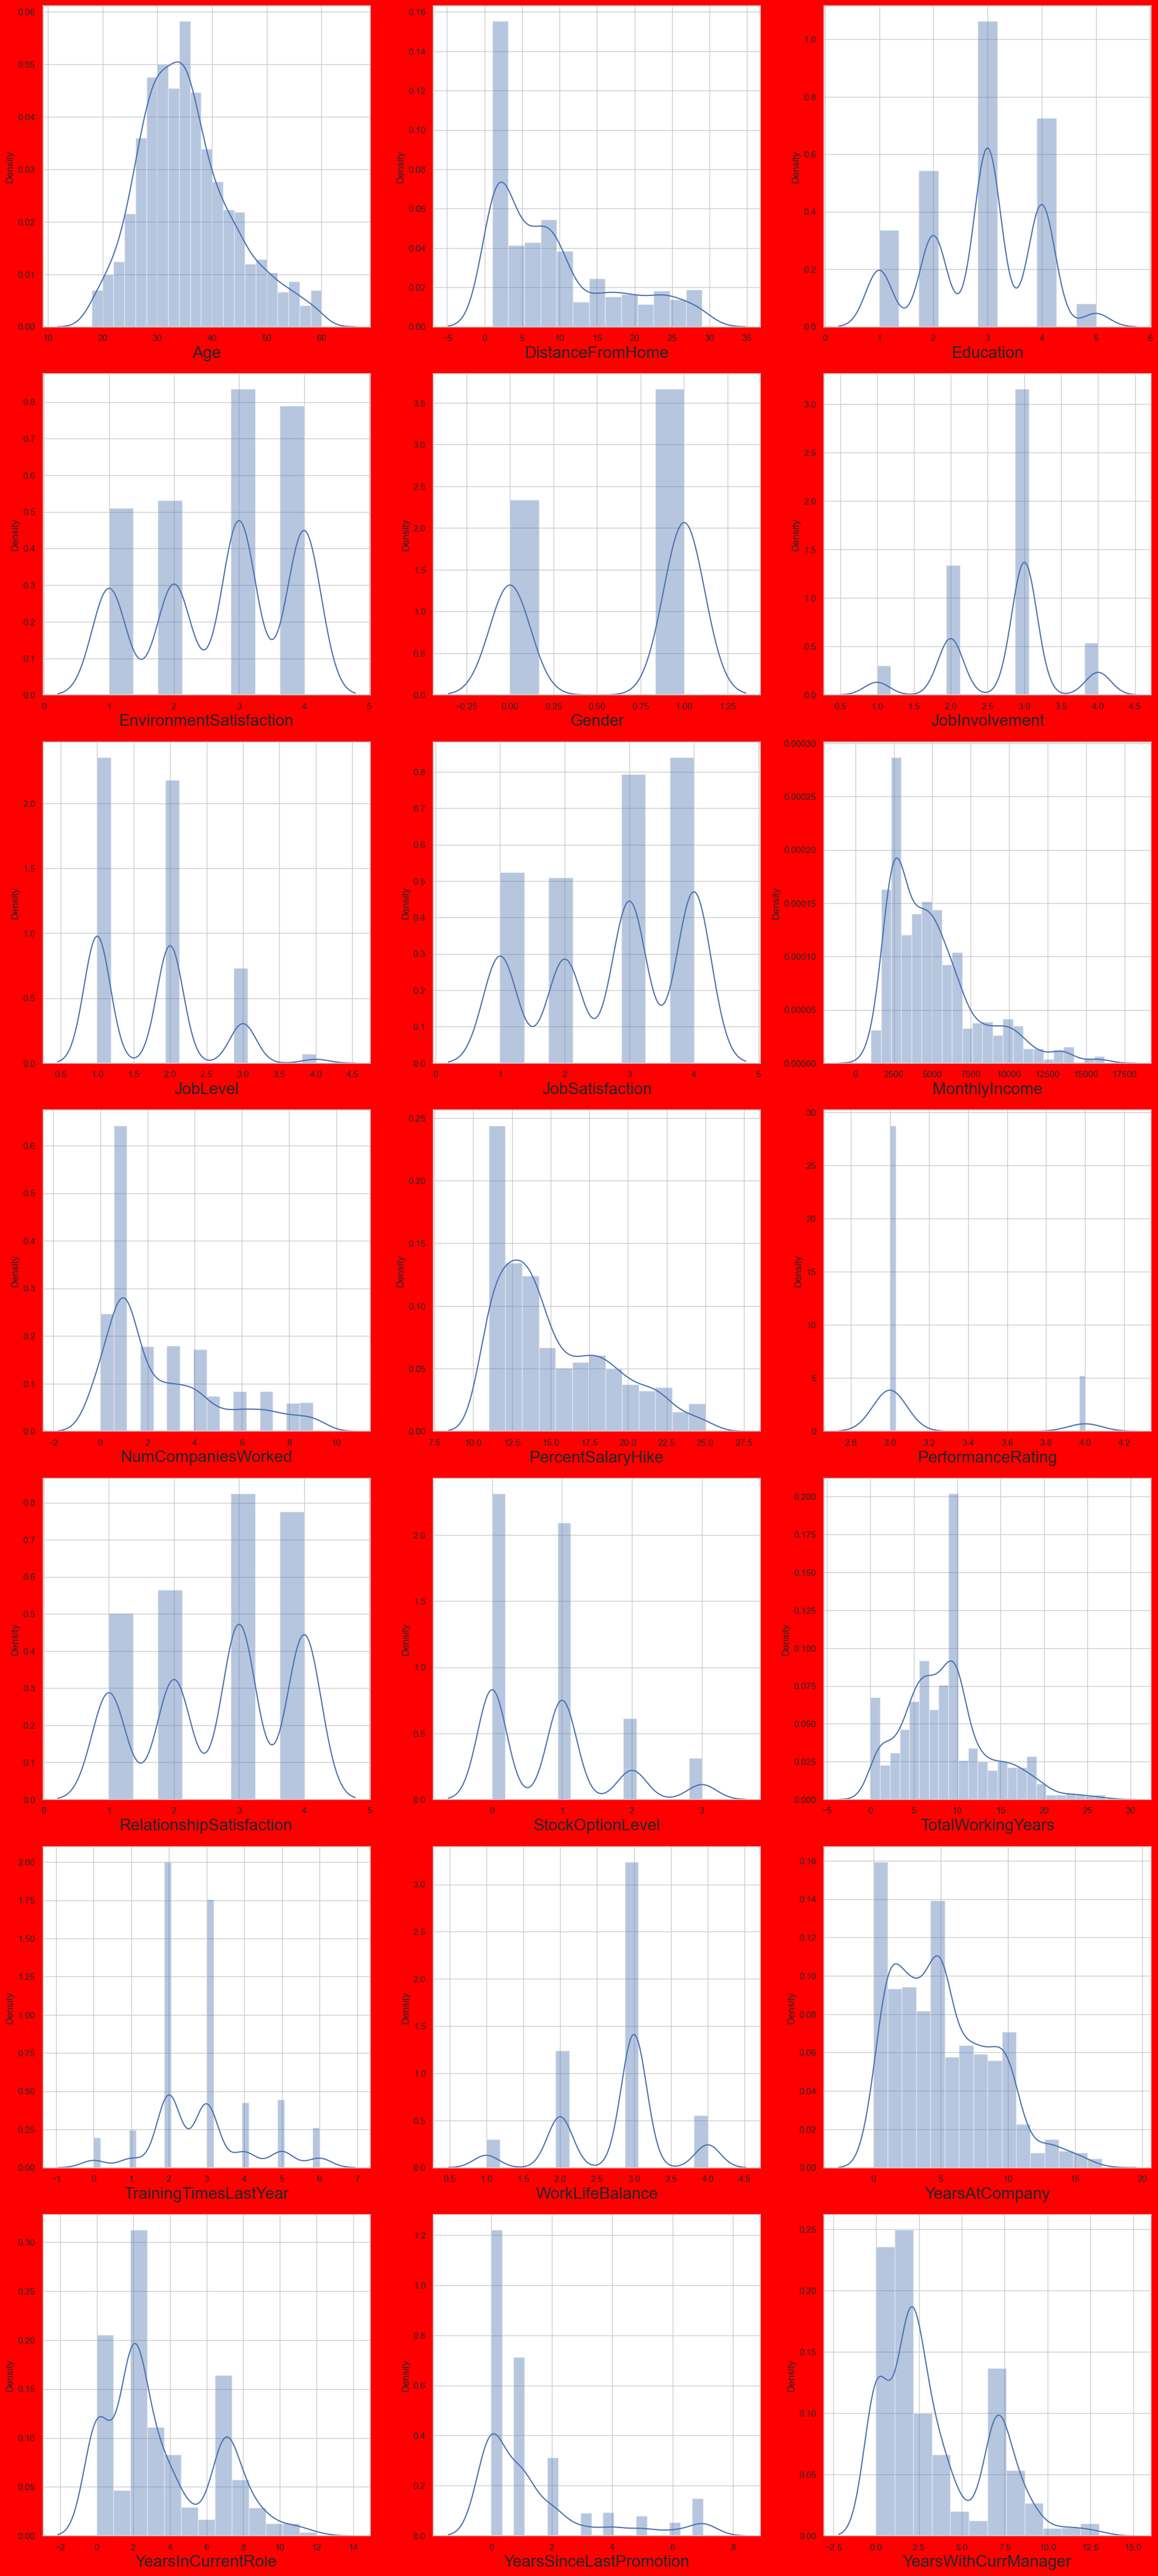

In [133]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,50) , facecolor='red')
plotnumber=1

for columns in data[['Age','DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender','JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]:
    if plotnumber <=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV as rsv

In [135]:
#Now Split our data in test and training set
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size = 0.30, random_state = 41)

In [136]:
random_clf=RandomForestClassifier()

In [137]:
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 100.00%

==================Test Result=======================
Accuracy Score : 84.02%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       330
           1       0.30      0.05      0.09        58

    accuracy                           0.84       388
   macro avg       0.58      0.52      0.50       388
weighted avg       0.77      0.84      0.79       388



In [139]:
params={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print("best_params => ",grd.best_params_)

best_params =>  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 400}


In [140]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=400)

In [141]:
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 94.46%

==================Test Result=======================
Accuracy Score : 84.54%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       330
           1       0.40      0.07      0.12        58

    accuracy                           0.85       388
   macro avg       0.63      0.53      0.52       388
weighted avg       0.79      0.85      0.80       388



In [142]:
#Plot ROC/AUC for multiple models without hyperparams tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [143]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [144]:
# training with all classifiers
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print("All Models Are Trained")

All Models Are Trained


In [145]:
#All Models Score Are Captured
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
print("All models test score are captured")

All models test score are captured


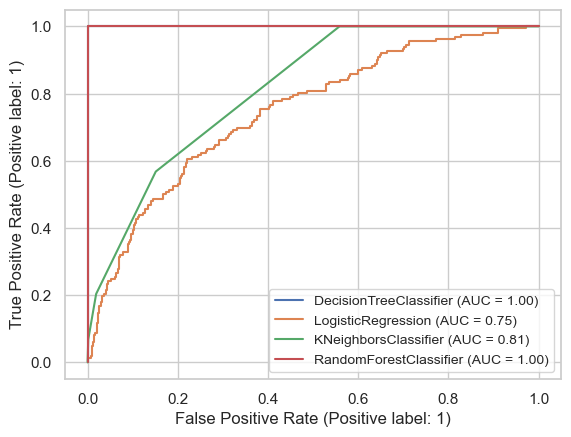

In [146]:
# How well our models works onn training data 
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

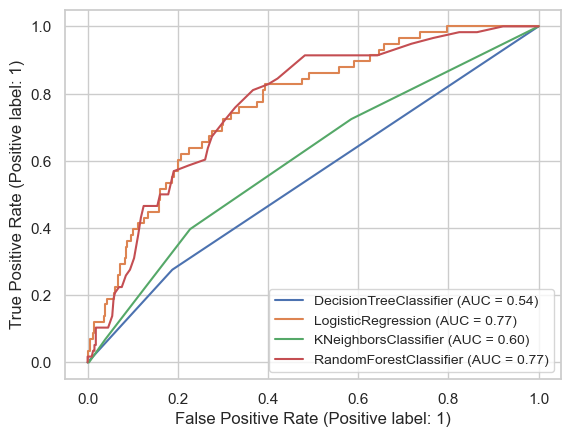

In [147]:
# How well our models works onn test data 
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [148]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=30)
rfc_rsv.fit(x_train,y_train)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=30, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [6, 9],
                                        'n_estimators': [200, 400]})

best score= 0.835089605734767

best parameters for RFC=
 {'n_estimators': 400, 'max_depth': 9, 'criterion': 'entropy'}


In [149]:
rfc=rfc_rsv.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=400)

In [150]:
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 94.46%

==================Test Result=======================
Accuracy Score : 84.54%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       330
           1       0.40      0.07      0.12        58

    accuracy                           0.85       388
   macro avg       0.63      0.53      0.52       388
weighted avg       0.79      0.85      0.80       388



In [151]:
#rfc=RandomForestClassifier()"
params={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
#rfc_rsv=rsv(rfc,rfc_para,cv=30)
#rfc_rsv.fit(x_train,y_train)
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print("best_params => ",grd.best_params_)
#print(rfc_rsv)
#print('\nbest score=',rfc_rsv.best_score_)
#print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

best_params =>  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}


In [152]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200)

In [153]:
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 94.57%

==================Test Result=======================
Accuracy Score : 84.79%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       330
           1       0.45      0.09      0.14        58

    accuracy                           0.85       388
   macro avg       0.66      0.53      0.53       388
weighted avg       0.80      0.85      0.80       388

